<link rel="stylesheet" href="css/custom.css">
<h1  id="title"> Principal Components analysis: sports analysis</h1>
<h3> Statistical learning Bachelor in Data Science and Engineering <br> 
UC3M, 2021</h3>

<h1> Motivation </h1>

In [92]:
setwd("C:/Users/ecurbelo/Dropbox/Class on progress/Statistical learning")

**Sports analytics**: collection of relevant, historical, statistics that can provide a competitive advantage to a team or individual.

In this case study, we will analyze data from NBA and try to answer these questions?

* How can we know who are the best all-time NBA players based on basketball skills (not only points)?

* Do NBA players have skills that exceed their predefined positions (point guard, shooting guard, small forward, power forward, and center)?

* Can we help NBA coachers to make better decisions? Are they really making right decisions?

Based on data of all-time leaders from here: http://stats.nba.com/alltime-leaders/

First of all, let's load the libraries needed

In [93]:
options(warnings=-1)
library(tidyverse)
library(GGally) # ggplot2-based visualization of correlations
library(factoextra) # ggplot2-based visualization of pca

<h2>Load and prepare data </h2> 
<br>
The dataset contains skill performance of the most important NBA players in the history.  

In [94]:
historical_players.df = read.csv(file = "nba.csv", header=T, sep=";")

glimpse(historical_players.df)

Rows: 1,214
Columns: 26
$ player_id   <int> 893, 76375, 76127, 201142, 2544, 78497, 947, 77847, 76804,~
$ player_name <chr> "Michael Jordan", "Wilt Chamberlain", "Elgin Baylor", "Kev~
$ gp          <int> 1072, 1045, 846, 703, 1061, 932, 914, 792, 791, 1040, 1476~
$ min         <dbl> 38.25653, 45.79809, 40.02719, 37.37980, 38.90009, 39.23927~
$ fgm         <dbl> 11.37313, 12.13493, 10.27541, 9.19346, 9.82375, 9.67382, 9~
$ fga         <dbl> 22.88899, 22.48517, 23.84279, 18.85349, 19.60697, 20.42060~
$ fg_pct      <dbl> 0.497, 0.540, 0.431, 0.488, 0.501, 0.474, 0.425, 0.436, 0.~
$ fg3m        <dbl> 0.54198, NA, NA, 1.79232, 1.38266, NA, 1.15864, NA, 0.0973~
$ fg3a        <dbl> 1.65858, NA, NA, 4.72404, 4.04807, NA, 3.70131, NA, 0.3274~
$ fg3_pct     <dbl> 0.327, NA, NA, 0.379, 0.342, NA, 0.313, NA, 0.297, NA, 0.2~
$ ftm         <dbl> 6.83489, 5.79617, 6.81206, 7.01991, 6.10179, 7.68240, 6.97~
$ fta         <dbl> 8.18284, 11.35120, 8.73641, 7.96017, 8.24882, 9.44313, 8.9~
$ ft_pct      <d

These are the 1200 best players in the NBA history

<p id="text">These are the variables:

* gp: Games Played 
* min: Minutes Played PTS Points 
* fgm: Field Goals Made 
* fga: Field Goals Attempted 
* fg_pct Field Goal Percentage 
* fg3m 3 Point Field Goals Made 
* fg3a 3 Point Field Goals Attempted 
* fg3_pct 3 Point Field Goals Percentage 
* ftm Free Throws Made 
* fta Free Throws Attempted 
* ft_pct Free Throw Percentage 
* oreb Offensive Rebounds 
* dreb Defensive Rebounds 
* reb Rebounds 
* ast Assists 
* stl Steals 
* blk Blocks 
* tov Turnovers 
* eg% Effective Field Goal Percentage 
* TS% True Shooting Percentage
    
</p>

<h2> Missing values </h2>

<p id="text"> As you know we have to check for missing values.</p>

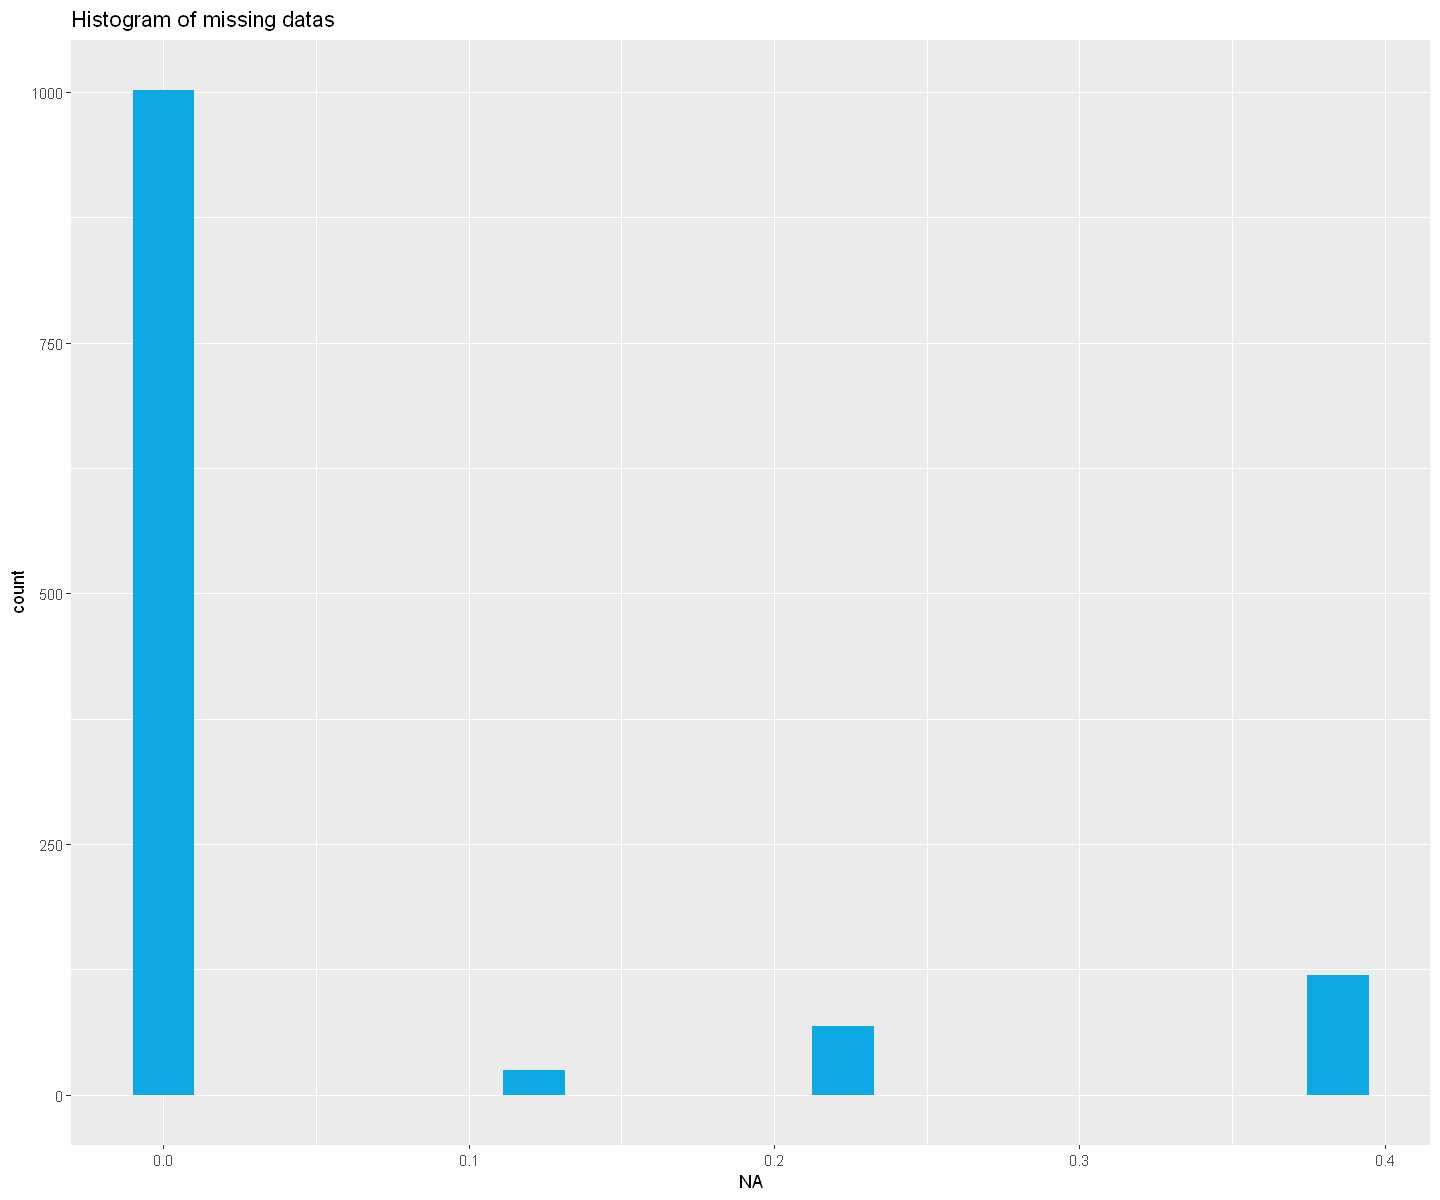

In [97]:
options(repr.plot.width=12)
ggplot() + geom_histogram(aes(x=rowMeans(is.na(historical_players.df))),bins=20,fill="#0DA9E4") + 
labs(x="NA",title="Histogram of missing datas")

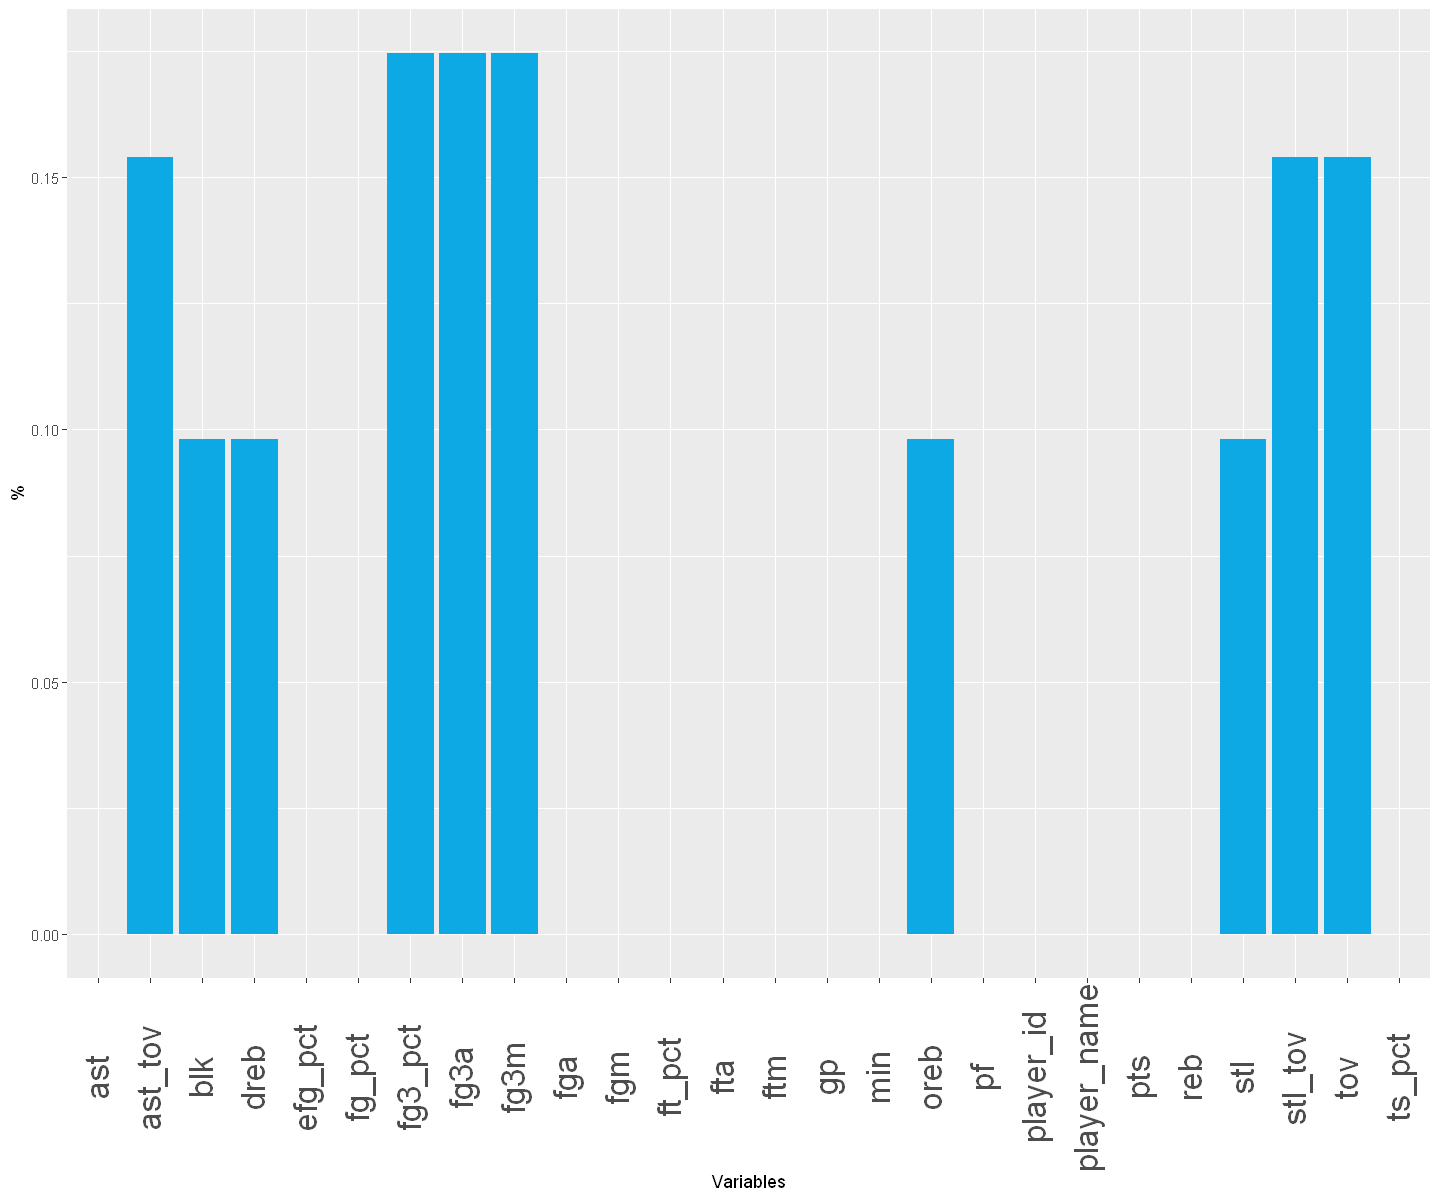

In [96]:
options(repr.plot.width=12)
ggplot() + geom_col(aes(x=rownames(na),y=na[,1]),fill="#0DA9E4") + theme(axis.text.x=element_text(angle=90,size=20,vjust=0.4)) + 
labs(x="Variables",y="%")

<p id="text"> There is not that much missing data so let's remove the players with missing data </p>

In [8]:
historical_players.df = historical_players.df[rowSums(is.na(historical_players.df)) == 0,]
str(historical_players.df)

'data.frame':	1002 obs. of  26 variables:
 $ player_id  : int  893 201142 2544 947 76804 252 977 1122 2546 76003 ...
 $ player_name: chr  "Michael Jordan" "Kevin Durant" "LeBron James" "Allen Iverson" ...
 $ gp         : int  1072 703 1061 914 791 1476 1346 1074 976 1560 ...
 $ min        : num  38.3 37.4 38.9 41.1 33.5 ...
 $ fgm        : num  11.37 9.19 9.82 9.26 10.17 ...
 $ fga        : num  22.9 18.9 19.6 21.8 19.9 ...
 $ fg_pct     : num  0.497 0.488 0.501 0.425 0.511 0.516 0.447 0.461 0.452 0.559 ...
 $ fg3m       : num  0.542 1.7923 1.3827 1.1586 0.0974 ...
 $ fg3a       : num  1.659 4.724 4.048 3.701 0.327 ...
 $ fg3_pct    : num  0.327 0.379 0.342 0.313 0.297 0.274 0.329 0.319 0.346 0.056 ...
 $ ftm        : num  6.83 7.02 6.1 6.97 5.74 ...
 $ fta        : num  8.18 7.96 8.25 8.94 6.81 ...
 $ ft_pct     : num  0.835 0.882 0.74 0.78 0.844 0.742 0.837 0.811 0.813 0.721 ...
 $ oreb       : num  1.556 0.787 1.215 0.815 1.499 ...
 $ dreb       : num  4.67 6.37 6.05 2.9 3.06 ...
 $

<p id="text">After doing this we can create the data frame to use, be aware that the two first columns are not needed.</p>

In [9]:
nba = historical_players.df[,3:ncol(historical_players.df)] # drop the first two columns
nba = data.frame(sapply(nba,as.numeric)) # put all the variables as numeric
names = historical_players.df[,2]
str(nba)

'data.frame':	1002 obs. of  24 variables:
 $ gp     : num  1072 703 1061 914 791 ...
 $ min    : num  38.3 37.4 38.9 41.1 33.5 ...
 $ fgm    : num  11.37 9.19 9.82 9.26 10.17 ...
 $ fga    : num  22.9 18.9 19.6 21.8 19.9 ...
 $ fg_pct : num  0.497 0.488 0.501 0.425 0.511 0.516 0.447 0.461 0.452 0.559 ...
 $ fg3m   : num  0.542 1.7923 1.3827 1.1586 0.0974 ...
 $ fg3a   : num  1.659 4.724 4.048 3.701 0.327 ...
 $ fg3_pct: num  0.327 0.379 0.342 0.313 0.297 0.274 0.329 0.319 0.346 0.056 ...
 $ ftm    : num  6.83 7.02 6.1 6.97 5.74 ...
 $ fta    : num  8.18 7.96 8.25 8.94 6.81 ...
 $ ft_pct : num  0.835 0.882 0.74 0.78 0.844 0.742 0.837 0.811 0.813 0.721 ...
 $ oreb   : num  1.556 0.787 1.215 0.815 1.499 ...
 $ dreb   : num  4.67 6.37 6.05 2.9 3.06 ...
 $ reb    : num  6.22 7.16 7.26 3.71 4.56 ...
 $ ast    : num  5.25 3.79 7.03 6.15 2.8 ...
 $ stl    : num  2.35 1.19 1.65 2.17 1.19 ...
 $ blk    : num  0.833 1.05 0.77 0.179 0.847 ...
 $ tov    : num  2.73 3.16 3.41 3.57 3.01 ...
 $ pf    

In [10]:
summary(nba)

       gp              min              fgm               fga        
 Min.   : 400.0   Min.   : 8.947   Min.   : 0.6232   Min.   : 1.531  
 1st Qu.: 532.5   1st Qu.:20.489   1st Qu.: 2.7673   1st Qu.: 5.963  
 Median : 682.5   Median :25.101   Median : 3.7753   Median : 8.220  
 Mean   : 718.5   Mean   :25.163   Mean   : 4.0994   Mean   : 8.819  
 3rd Qu.: 861.0   3rd Qu.:29.802   3rd Qu.: 5.2043   3rd Qu.:11.172  
 Max.   :1611.0   Max.   :41.120   Max.   :11.3731   Max.   :22.889  
     fg_pct            fg3m               fg3a            fg3_pct      
 Min.   :0.3730   Min.   :0.000000   Min.   :0.00000   Min.   :0.0000  
 1st Qu.:0.4370   1st Qu.:0.006258   1st Qu.:0.04473   1st Qu.:0.1520  
 Median :0.4610   Median :0.137780   Median :0.47784   Median :0.2945  
 Mean   :0.4645   Mean   :0.430171   Mean   :1.22112   Mean   :0.2492  
 3rd Qu.:0.4900   3rd Qu.:0.793380   3rd Qu.:2.20637   3rd Qu.:0.3510  
 Max.   :0.6770   Max.   :3.339720   Max.   :7.62892   Max.   :1.0000  
      

<h2> Some feature engineering </h2>

<p id="text">
We want to make some decisions based on the player's skills, not by the coach decisions. (This is optionally when performing the analysis.)  

Both, games played (gp) and minutes played per game (min) are things that the coach decides so let's remove them.
</p>

In [11]:
# skip the games played (gp)
gp = nba$gp
nba$gp = NULL

# skip the minutes played per game (min)
min = nba$min
nba$min = NULL

<p id = "text">
Take care: there are some redundant variables, for instance

* fgm, fga, and fg_pct
* fg3m, fg3a, and fg3_pct
* ftm, fta, and ft_pct
* oreb, dreb, and reb

Should we skip some of previous variables?
</p>

In [12]:
nba = nba[,-c(3,6,9,12,19,20,21,22)]
dim(nba)

[1] 1002   14

<p id="text">We can also remove variable pts, because pts = fgm+fg3m+ftm</p>

<h2> Descriptive Analysis </h2>

<p id="text">
Our input has dimension $p=14$, that implies $2^p$ different relations between the variables.

Dimension 1: univariate analysis for all 14 variables
</p>


Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths


No id variables; using all as measure variables



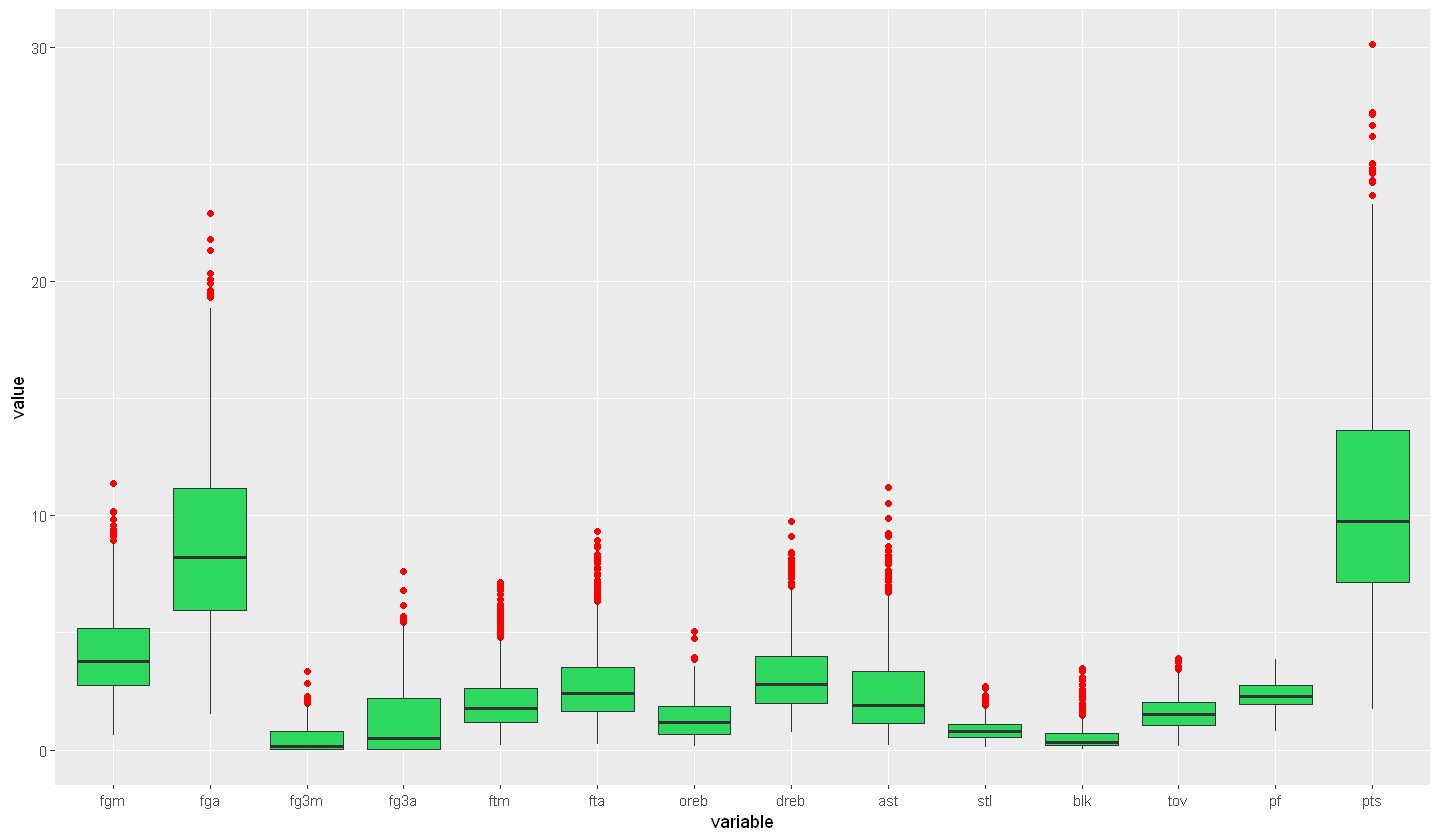

In [13]:
library(reshape2)
ggplot(melt(nba)) + geom_boxplot(aes(x=variable,y=value),fill="#2ED85F",outlier.color="red")

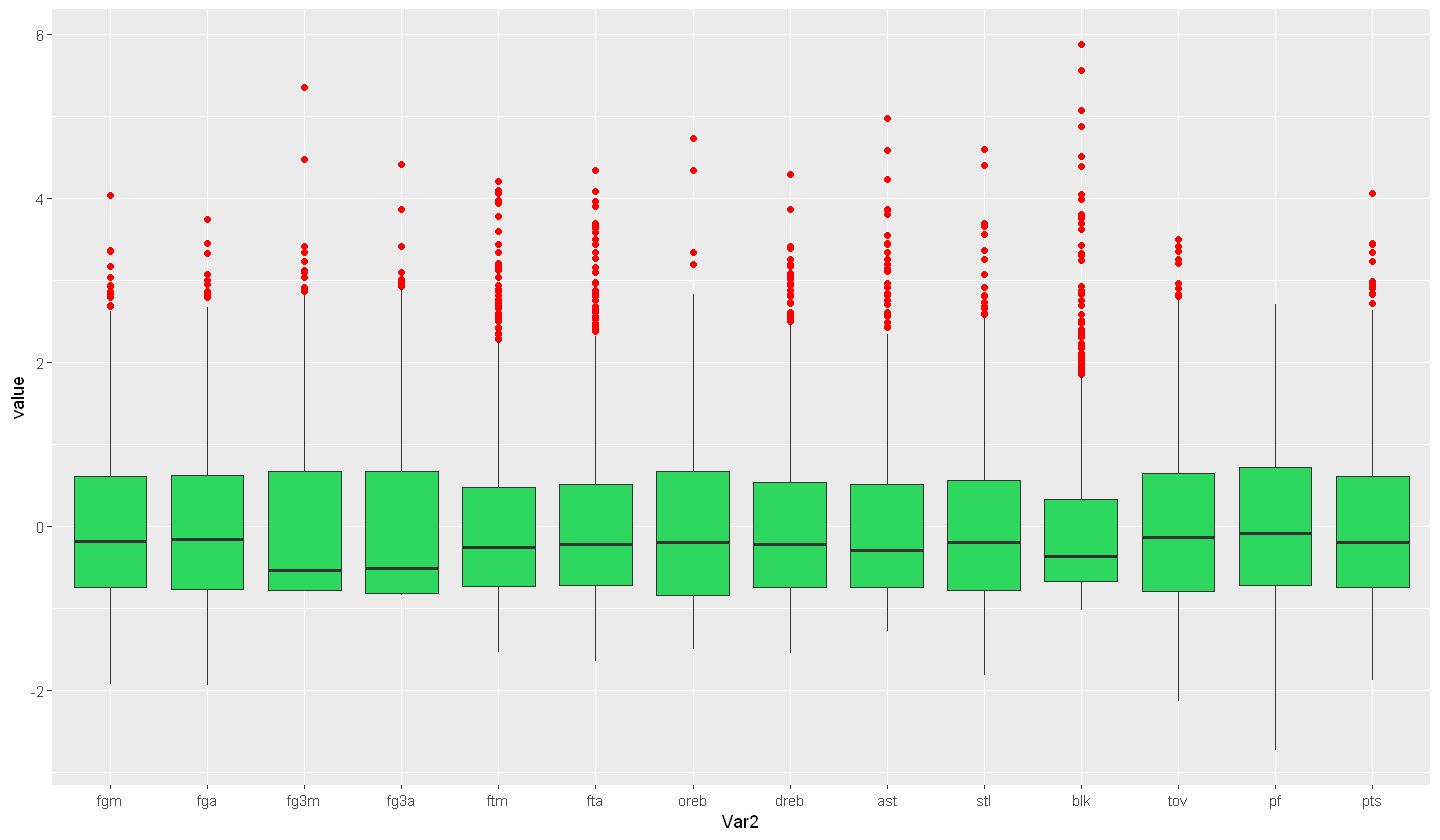

In [14]:
# scale or not to scale
ggplot(melt(scale(nba))) + geom_boxplot(aes(x=Var2,y=value),fill="#2ED85F",outlier.color="red")

<p id="text">Dimension 3: bivariate analysis (scatter plots), in total 91 $\left(\dfrac{p(p+1)}{2}\right)$. </p>

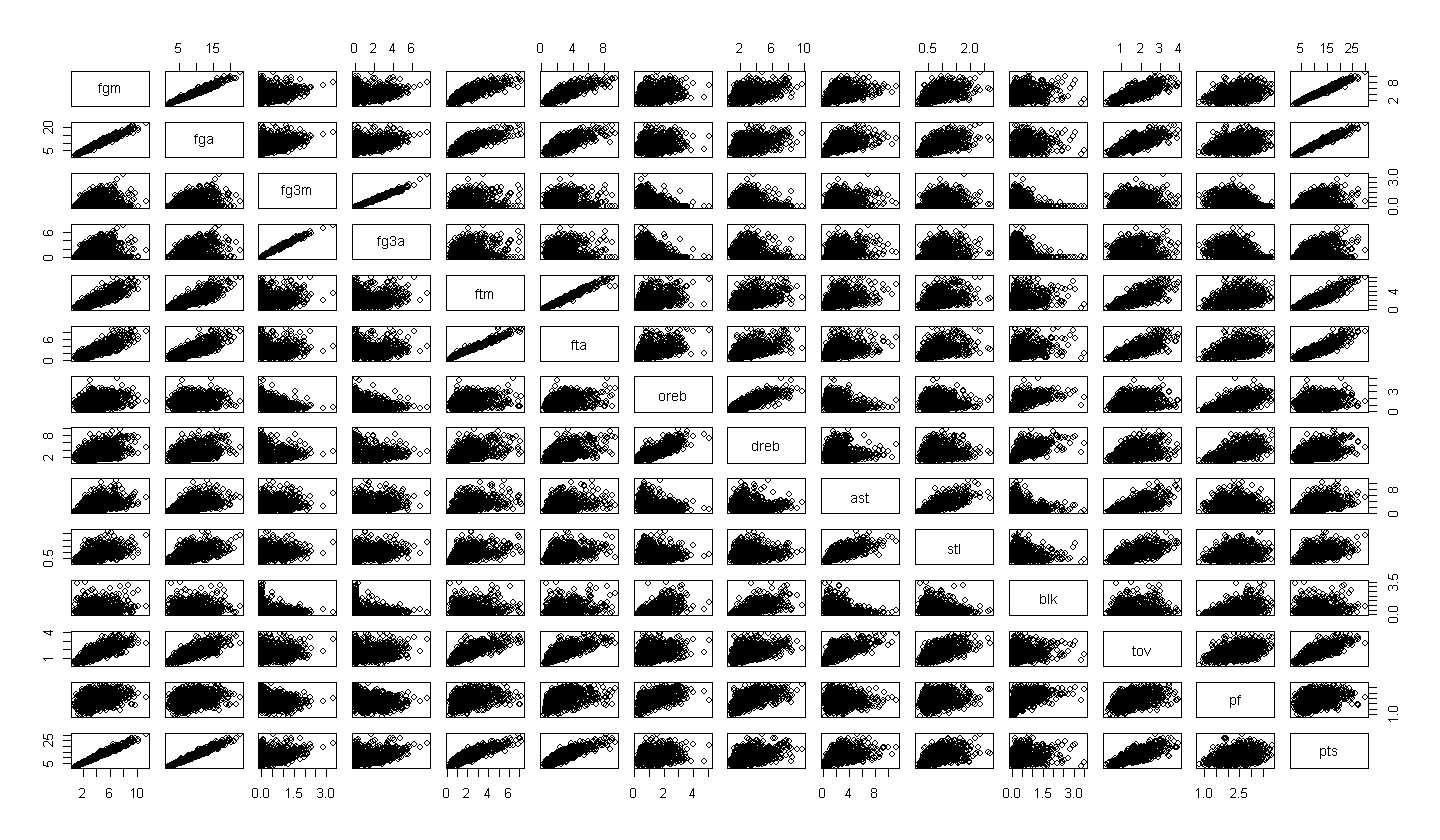

In [15]:
# multiple scatter plot: all relations, 14^2, in dimension 2
R = cor(nba)   # correlation matrix
pairs(nba)

<p id="text">Better to use a more efficient package</p>

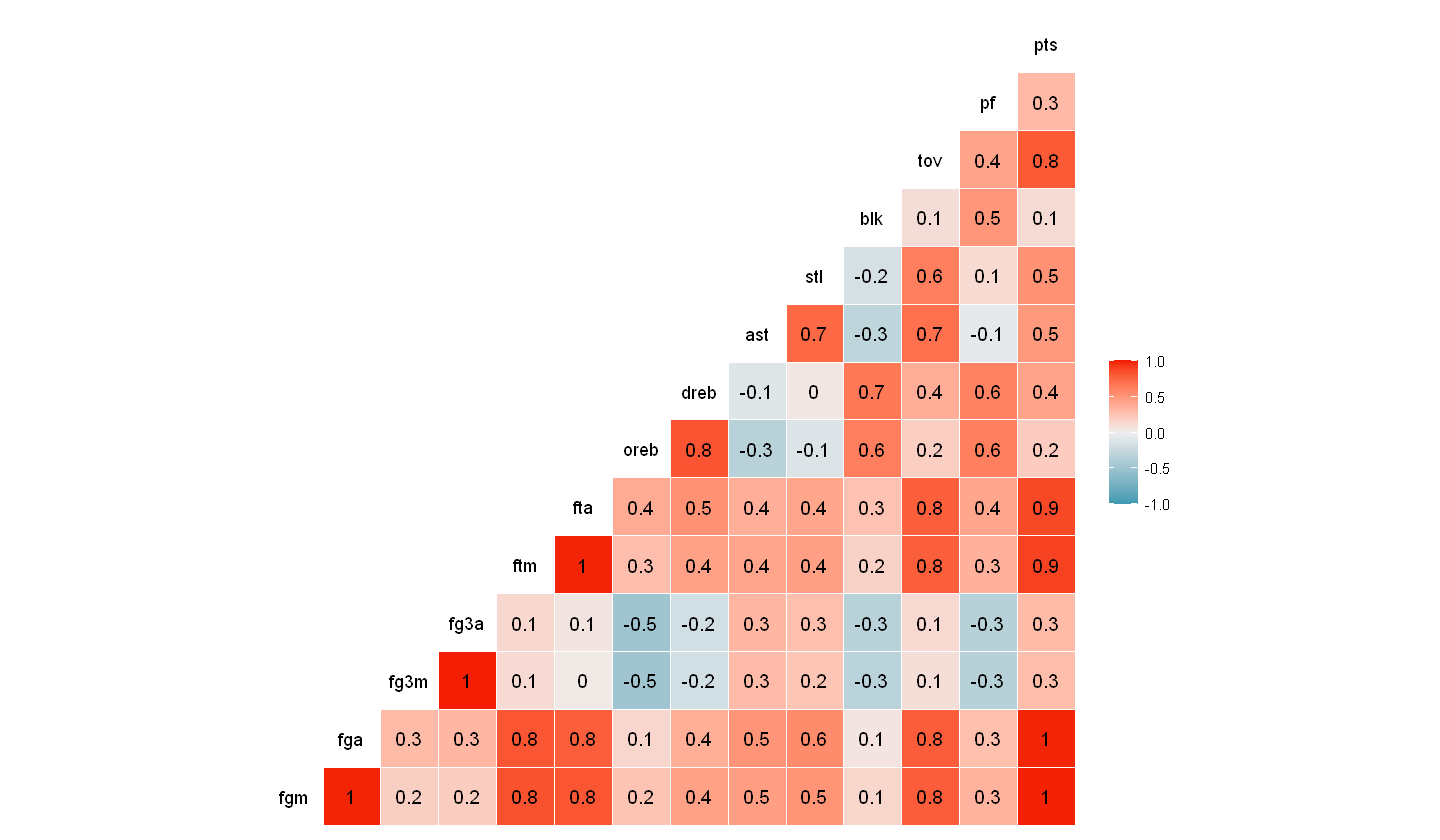

In [16]:
# Correlations with GGally
ggcorr(nba, label = T)

<p id="text">
Dimension 3: in total 364 relations, but no way to obtain information… This is why we need an analytical tool to reduce the dimension

Finally, note there are variables highly correlated, especially the most related ones (like ftm and fta)
</p>

<h2> PCA </h2>

<p id="text"> From dimension 14 to dimension 2 </p>

To use **PCA** on R we use the function **prcomp** from **factoextra** package

In [17]:
pca = prcomp(nba, scale=T)
# pca = princomp(nba, cor=T) # the same, but using SVD instead of eigen decomposition 
summary(pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6    PC7
Standard deviation     2.5527 1.9365 1.14528 0.87207 0.66804 0.62352 0.5845
Proportion of Variance 0.4654 0.2679 0.09369 0.05432 0.03188 0.02777 0.0244
Cumulative Proportion  0.4654 0.7333 0.82698 0.88130 0.91318 0.94095 0.9654
                           PC8     PC9    PC10    PC11    PC12    PC13
Standard deviation     0.51954 0.32415 0.29018 0.10838 0.10452 0.05660
Proportion of Variance 0.01928 0.00751 0.00601 0.00084 0.00078 0.00023
Cumulative Proportion  0.98463 0.99214 0.99815 0.99899 0.99977 1.00000
                            PC14
Standard deviation     1.217e-06
Proportion of Variance 0.000e+00
Cumulative Proportion  1.000e+00

<p id="text">
We see here the percentage of variance explained by each PC (it is calculated by dividing the variance of each component by the sum of all). As you know the first components explain the most of the variance on the data.
</p>

This is the same, but using mathematical format; here, eigenvalues denote variances and eigenvectors denote loadings:

In [18]:
eig = eigen(R);eig

eigen() decomposition
$values
 [1] 6.516031e+00 3.750053e+00 1.311660e+00 7.605024e-01 4.462804e-01
 [6] 3.887786e-01 3.416117e-01 2.699270e-01 1.050762e-01 8.420532e-02
[11] 1.174545e-02 1.092481e-02 3.204099e-03 1.479928e-12

$vectors
             [,1]        [,2]        [,3]        [,4]        [,5]         [,6]
 [1,] -0.36922030 -0.02438412  0.04098599  0.20409070 -0.02217614  0.054681929
 [2,] -0.36461715 -0.08985759  0.06601550  0.16535624 -0.05586589  0.050487516
 [3,] -0.06767709 -0.39117419  0.51624408 -0.21565265 -0.09540513 -0.019480246
 [4,] -0.07653384 -0.39653328  0.49586860 -0.22455453 -0.08099211 -0.012451617
 [5,] -0.35917188  0.01204853  0.01119035  0.29851863  0.04319516 -0.121741304
 [6,] -0.35750276  0.07244065  0.01416867  0.26256025  0.06805962 -0.091265156
 [7,] -0.12307400  0.43871651  0.12264197 -0.09033002 -0.01714259  0.503923551
 [8,] -0.20879802  0.33685490  0.27997968 -0.25300804  0.13743487  0.385327047
 [9,] -0.21413621 -0.28266143 -0.39322622 -0.3193436

<h2>How many components? </h2>

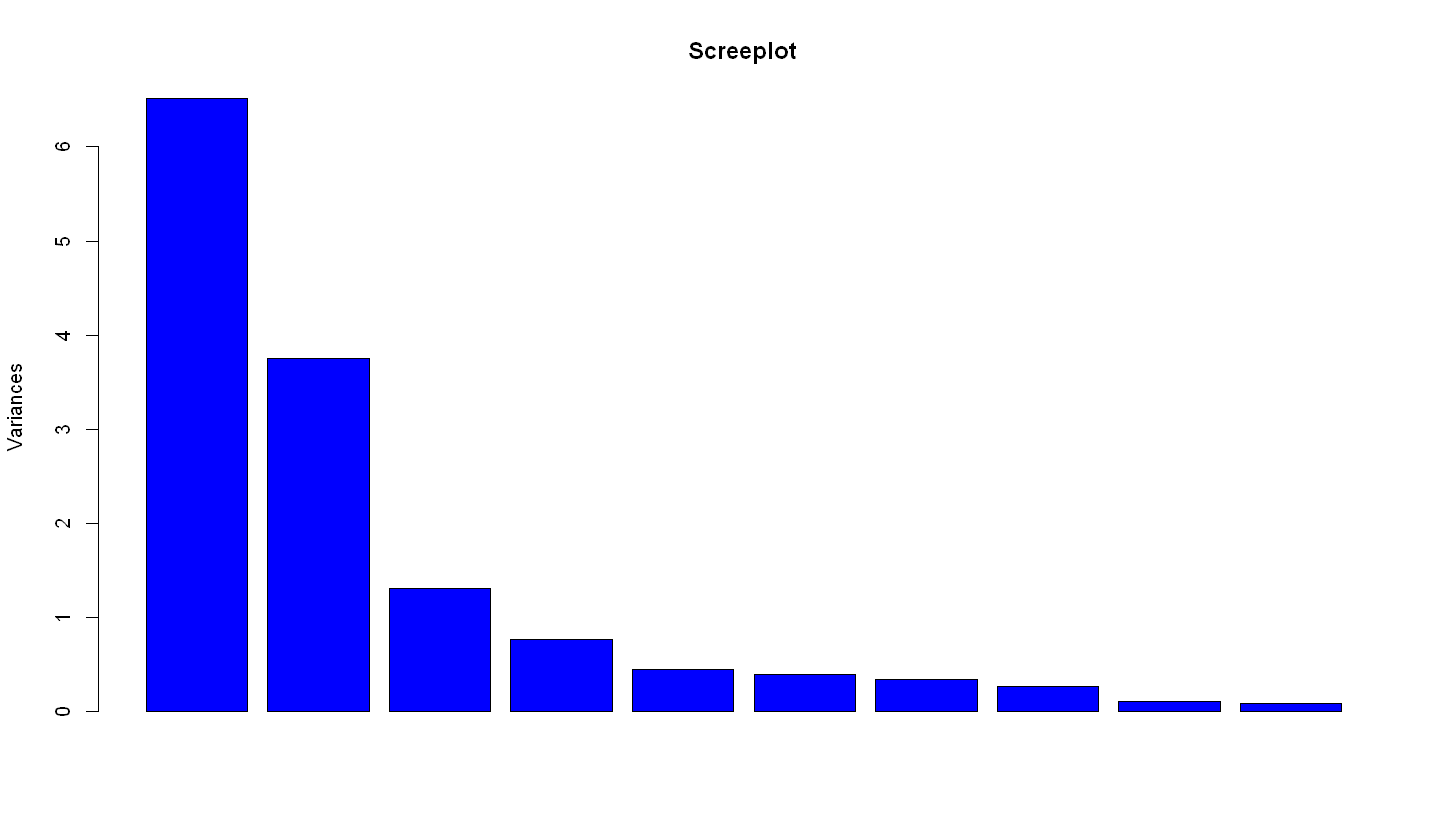

In [19]:
screeplot(pca,main="Screeplot",col="blue",type="barplot",pch=19)

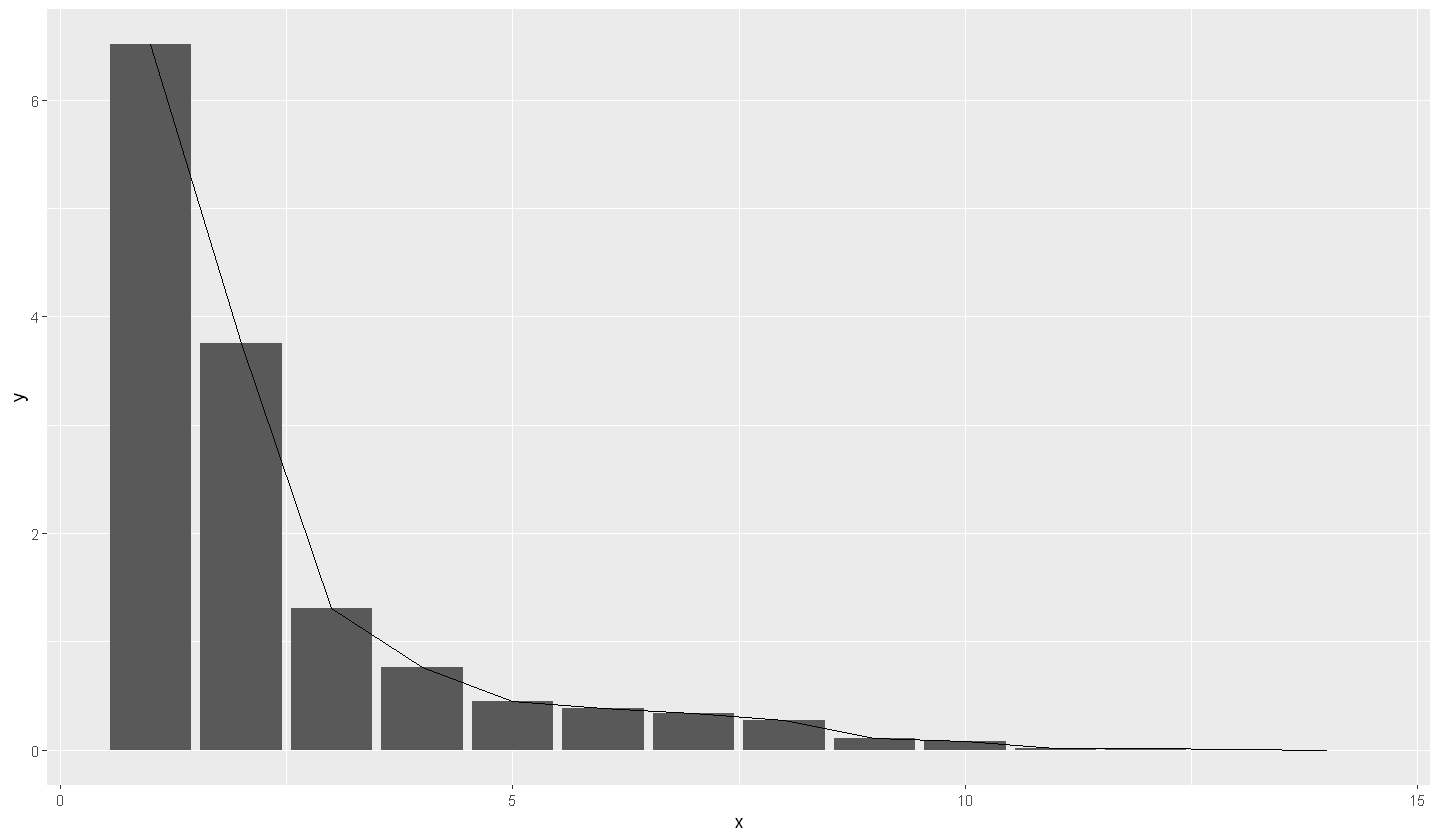

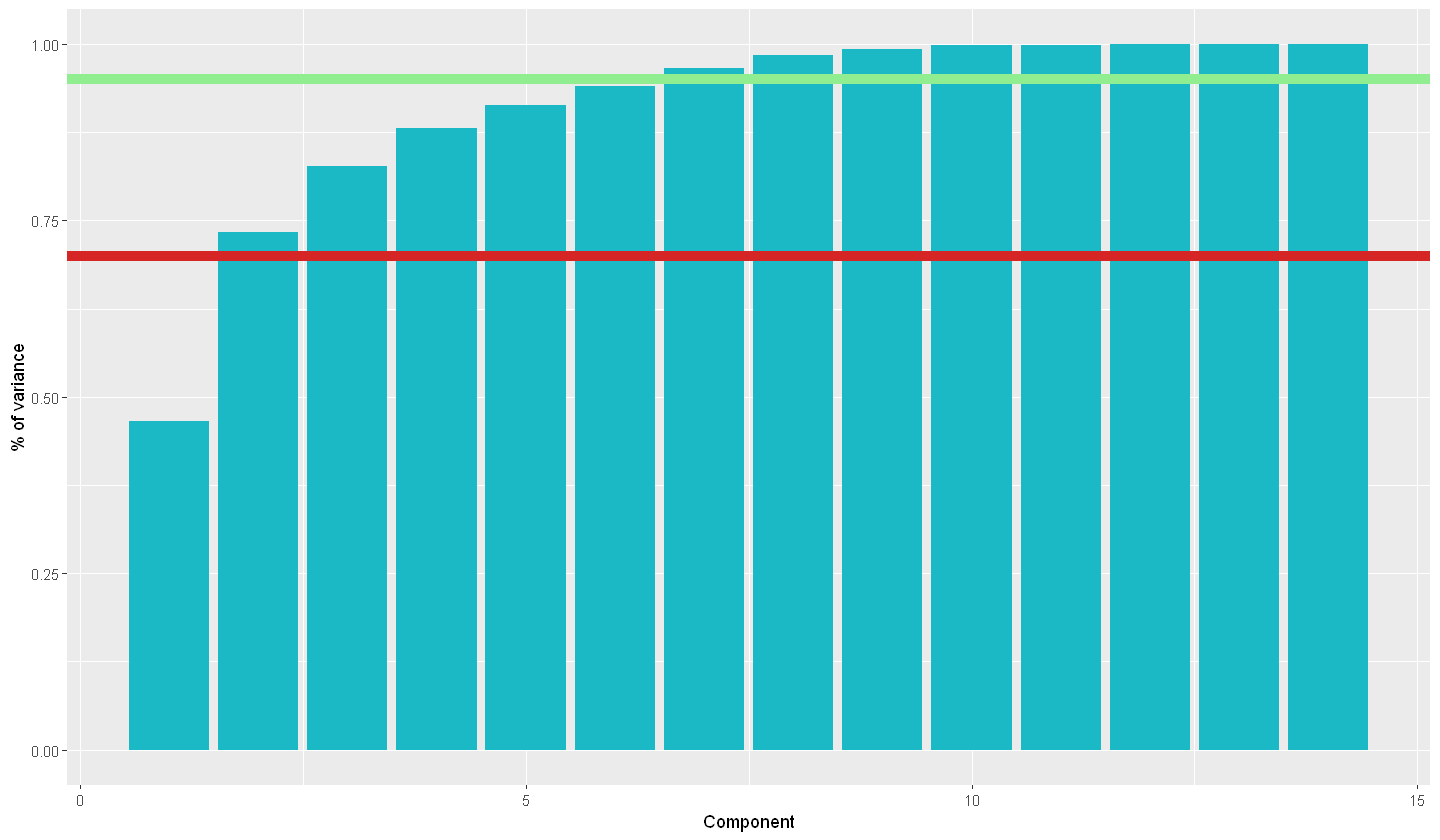

In [20]:
#the same but using ggplot
aux = data.frame(x = 1:length(eig$values),y = eig$values,z = cumsum(eig$values)/sum(eig$values))
ggplot(aux) + geom_col(aes(x=x,y=y)) + geom_line(aes(x=x,y=y)) 
ggplot(aux) + geom_col(aes(x=x,y=z),fill="#1BB8C5")+ geom_hline(yintercept=0.7,color="#D62525",lwd=3) +
geom_hline(yintercept=0.95,color="lightgreen",lwd=3) + xlab("Component") + ylab("% of variance")

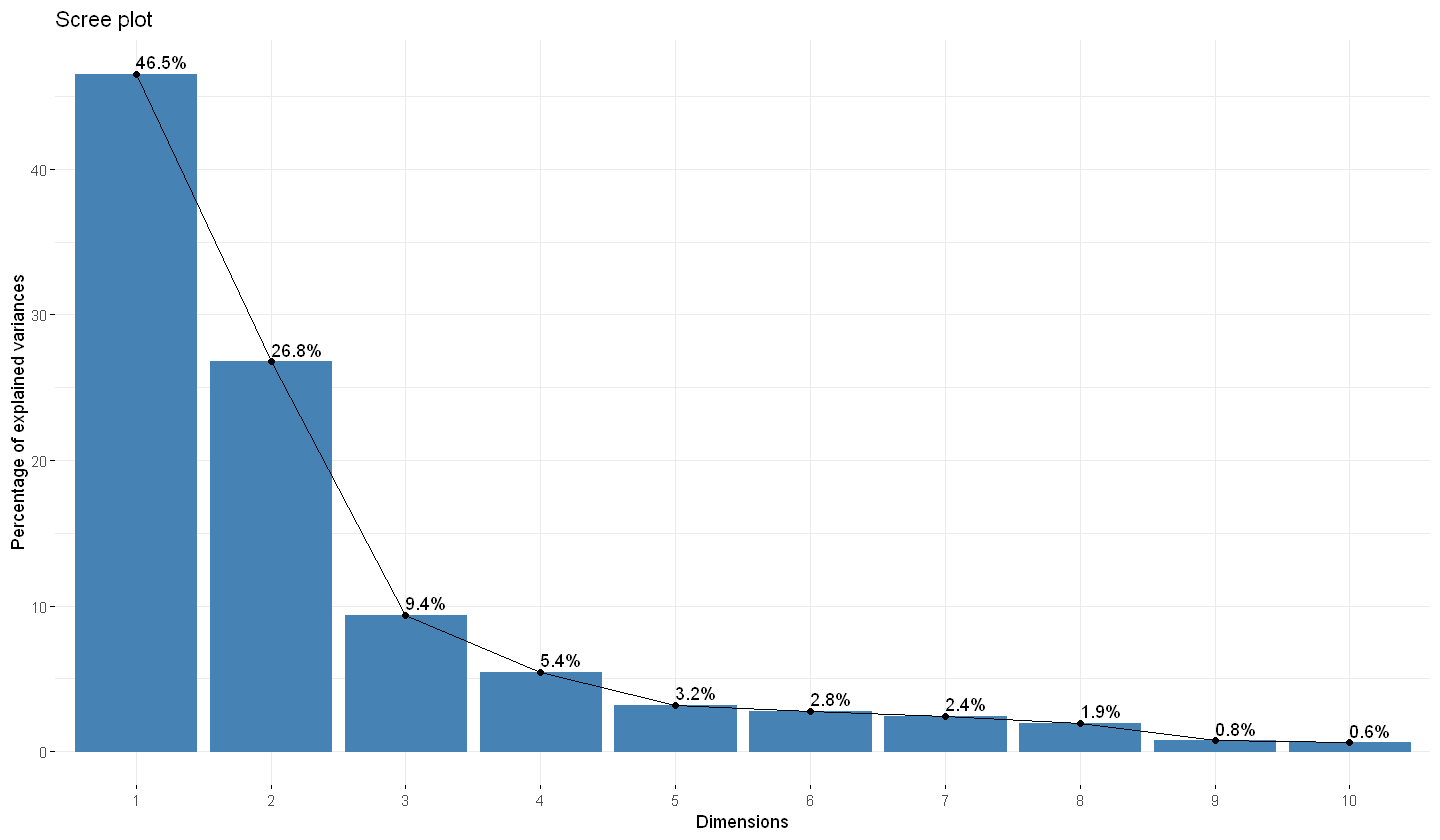

In [21]:
fviz_screeplot(pca, addlabels = TRUE)

<p id="text"> Note how with only two components we have more than the 70% of the variance. </p>

<h2> Interpretation of components </h2>

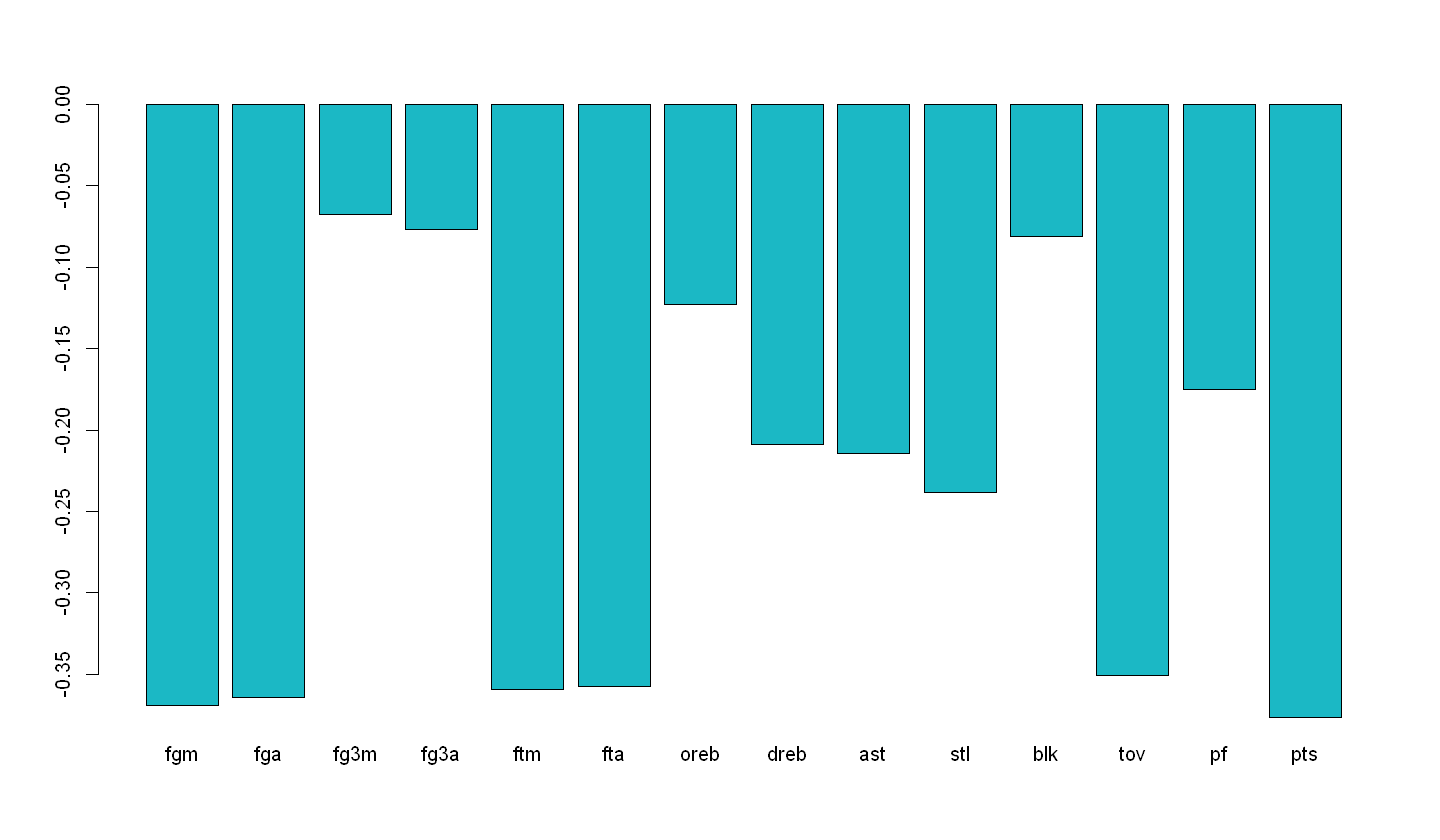

In [22]:
barplot(pca$rotation[,1],col="#1BB8C5")

<font size=4>
Any hint for the meaning of the 1st PC?
<br>
    
Note the sum of the squared loadings (eigenvectors) is equal to 1.


In [23]:
sum(pca$rotation[,1]^2)

[1] 1

<font size=4>
That means squared loadings are easier to interpret than the loadings. I.e. they are like percentages (numbers between 0 and 1). <br>

    
So let’s plot squared loadings instead.

They are called contribution of variables to components.

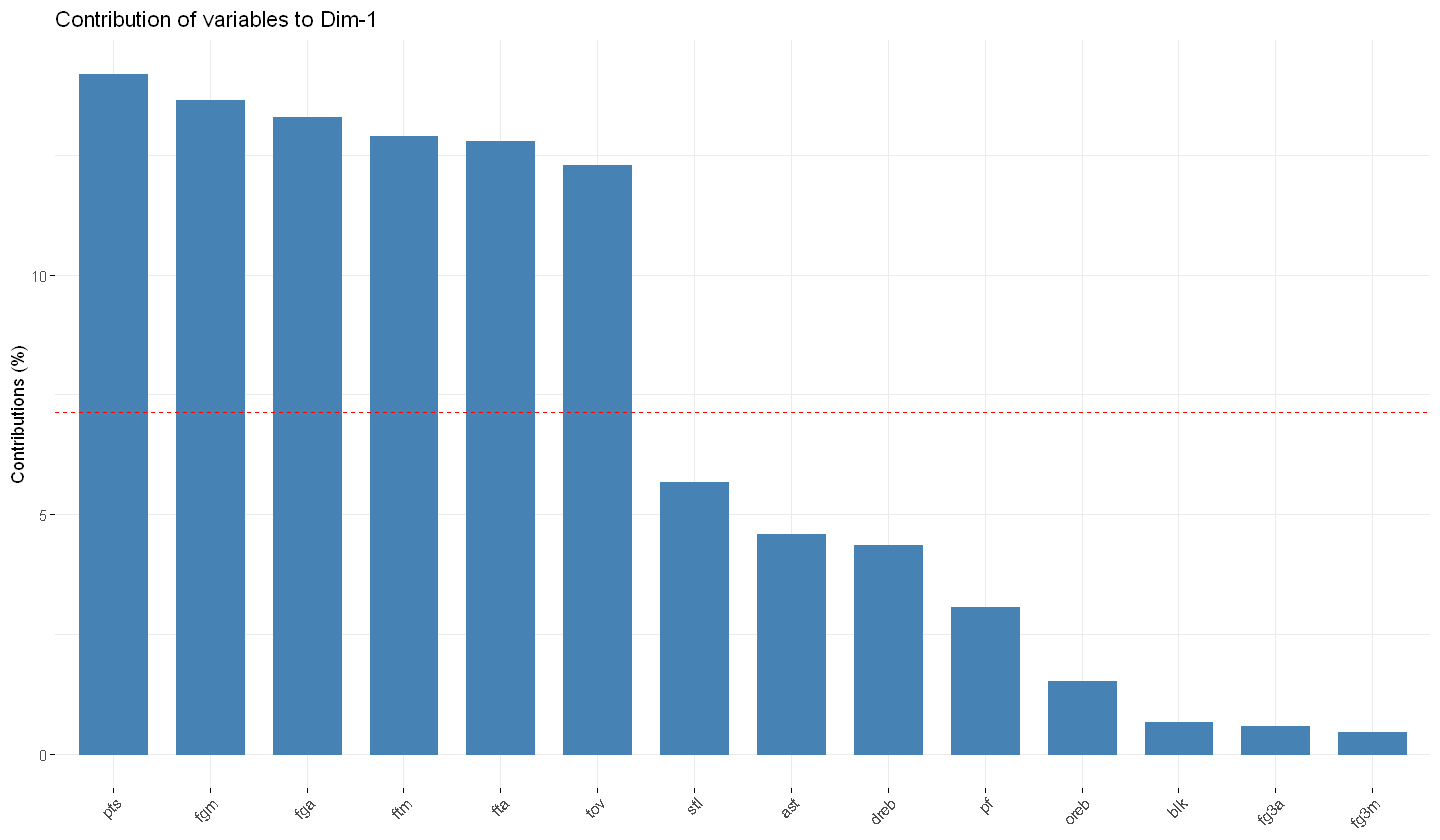

In [24]:
fviz_contrib(pca, choice = "var", axes = 1)

<font size=4>
The red dashed line on the graph above indicates the expected average contribution. <br>

If the contribution of the variables were uniform, the expected value would be 1/length(variables) = 1/14 = 7%.
    

Now we can rank the players by their first PC scores: best historical players in terms of performance:

In [25]:
names[order(pca$x[,1])][1:10]

[1] "Michael Jordan"    "Allen Iverson"     "LeBron James"     
 [4] "Karl Malone"       "Kevin Durant"      "Russell Westbrook"
 [7] "Charles Barkley"   "DeMarcus Cousins"  "Kobe Bryant"      
[10] "Larry Bird"

<font size=4>
Second component:

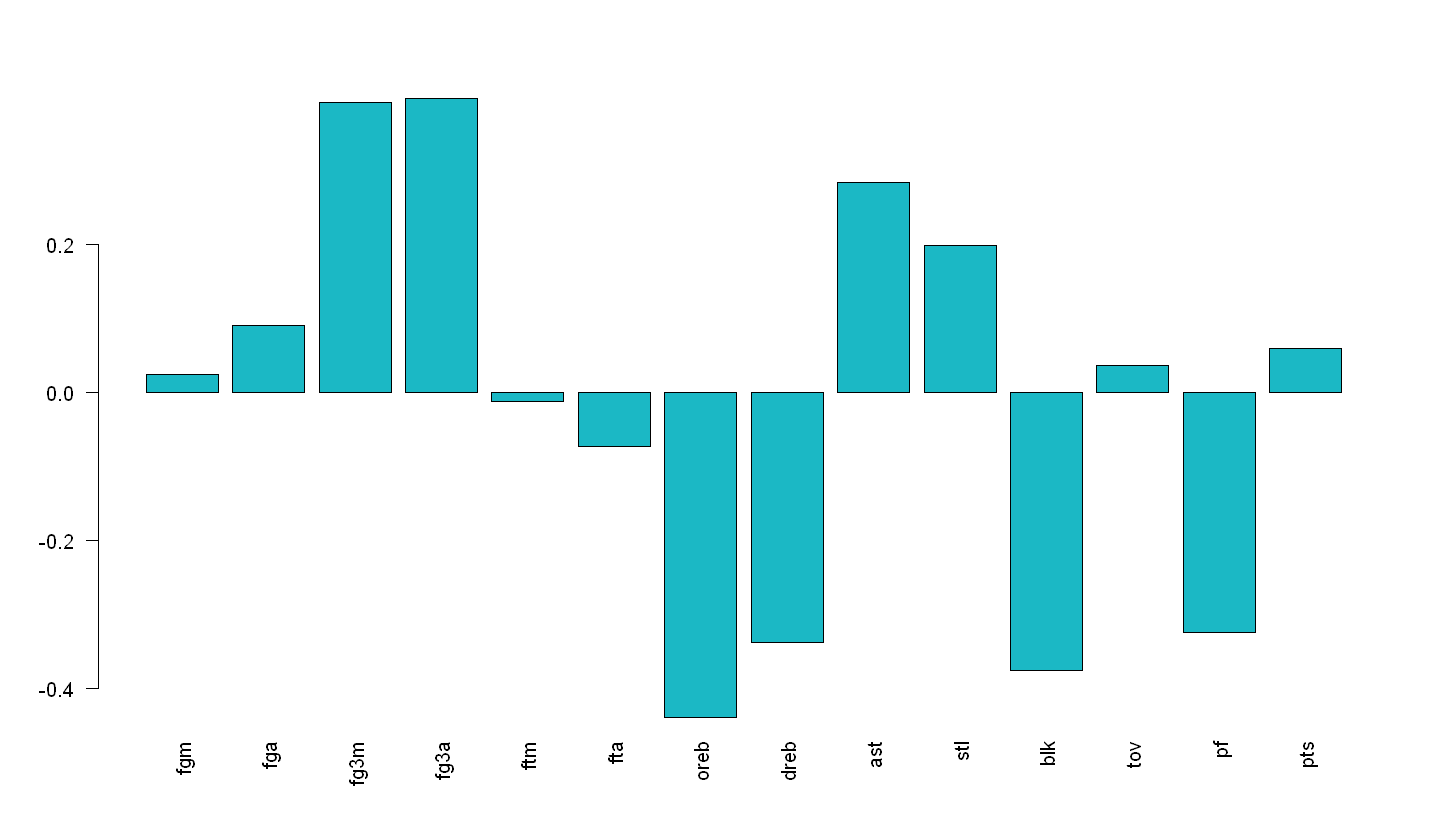

In [26]:
barplot(pca$rotation[,2],las=2,col="#1BB8C5")

<font size=4>
Any insight about this component?
<br>
    
Maybe we can get more insights by ranking the players using this component:

In [27]:
names[order(pca$x[,2])][1:6]

[1] "Dikembe Mutombo"  "Mark Eaton"       "Dwight Howard"    "Shaquille O'Neal"
[5] "Alonzo Mourning"  "Hakeem Olajuwon"

In [28]:
names[order(pca$x[,2])][(length(names)-5):length(names)]

[1] "Isaiah Thomas"  "Nick Van Exel"  "Klay Thompson"  "Jason Williams"
[5] "Tim Hardaway"   "Stephen Curry"

<font size=4>
Contribution of variables to second component:
<br>
    
Take care because we loose the sign (to get contribution in percentage)

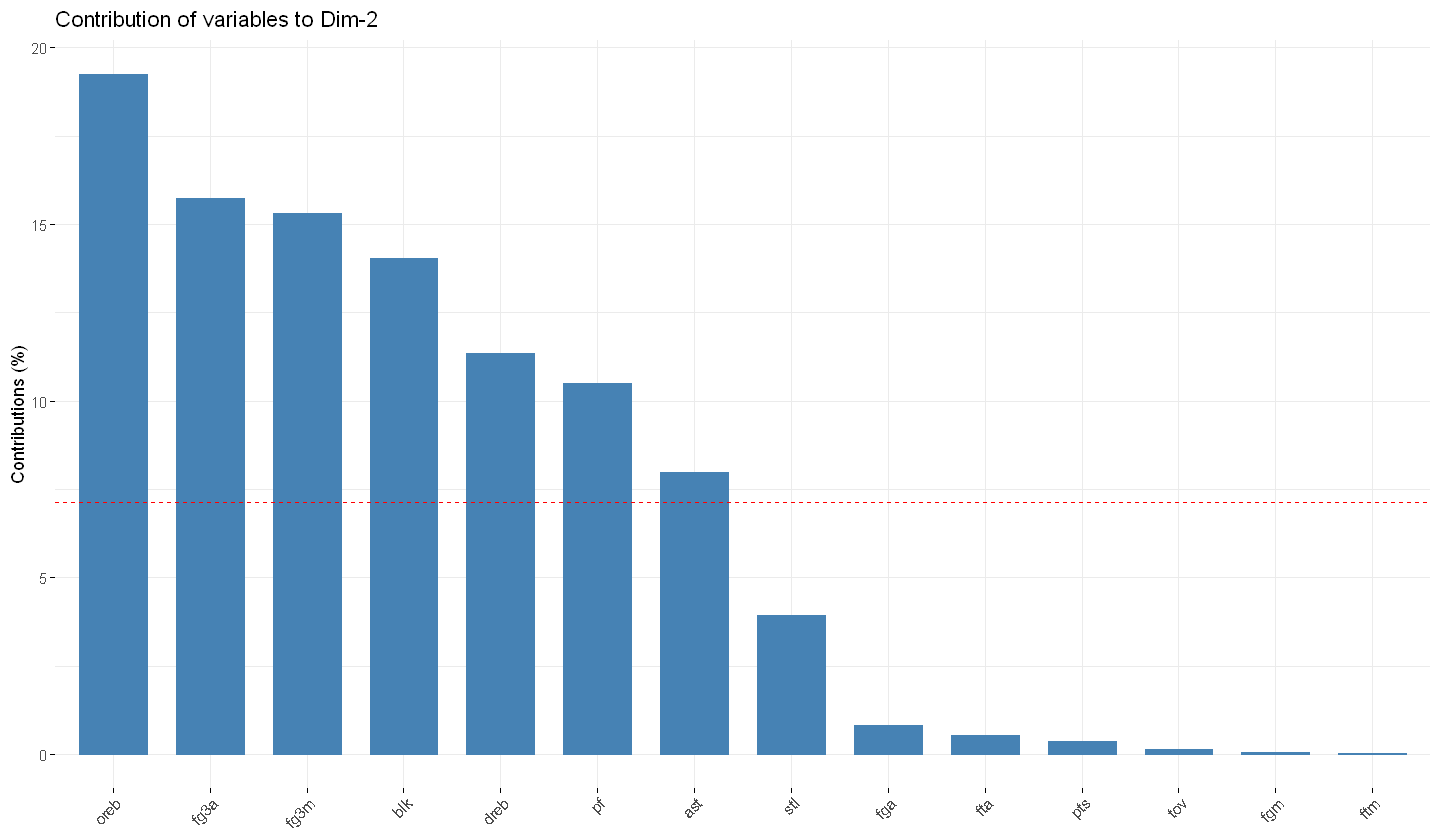

In [29]:
fviz_contrib(pca,choice="var",axes=2)

<font size=4>
Once we have interpreted the meaning of the first two components, let’s see the contribution of each player to components.  
For the $ i$-th player and first component, the contirbution is $ z^2_{1,i}/\lambda/n$ which is a number between 0 and 1.

In [30]:
head(get_pca_ind(pca)$contrib[,1]) # this is in %, that is between 0 and 100

1         2         3         4         5         6 
1.3270913 0.9458661 1.1137282 1.1558301 0.6963438 0.9932830

In [41]:
head((pca$x[,1]^2)/pca$sdev[1]^2)/dim(nba)[1]

[1] 0.013270913 0.009458661 0.011137282 0.011558301 0.006963438 0.009932830

<font size=4>
Let's visuzalize all players contributions to first component (global performance):

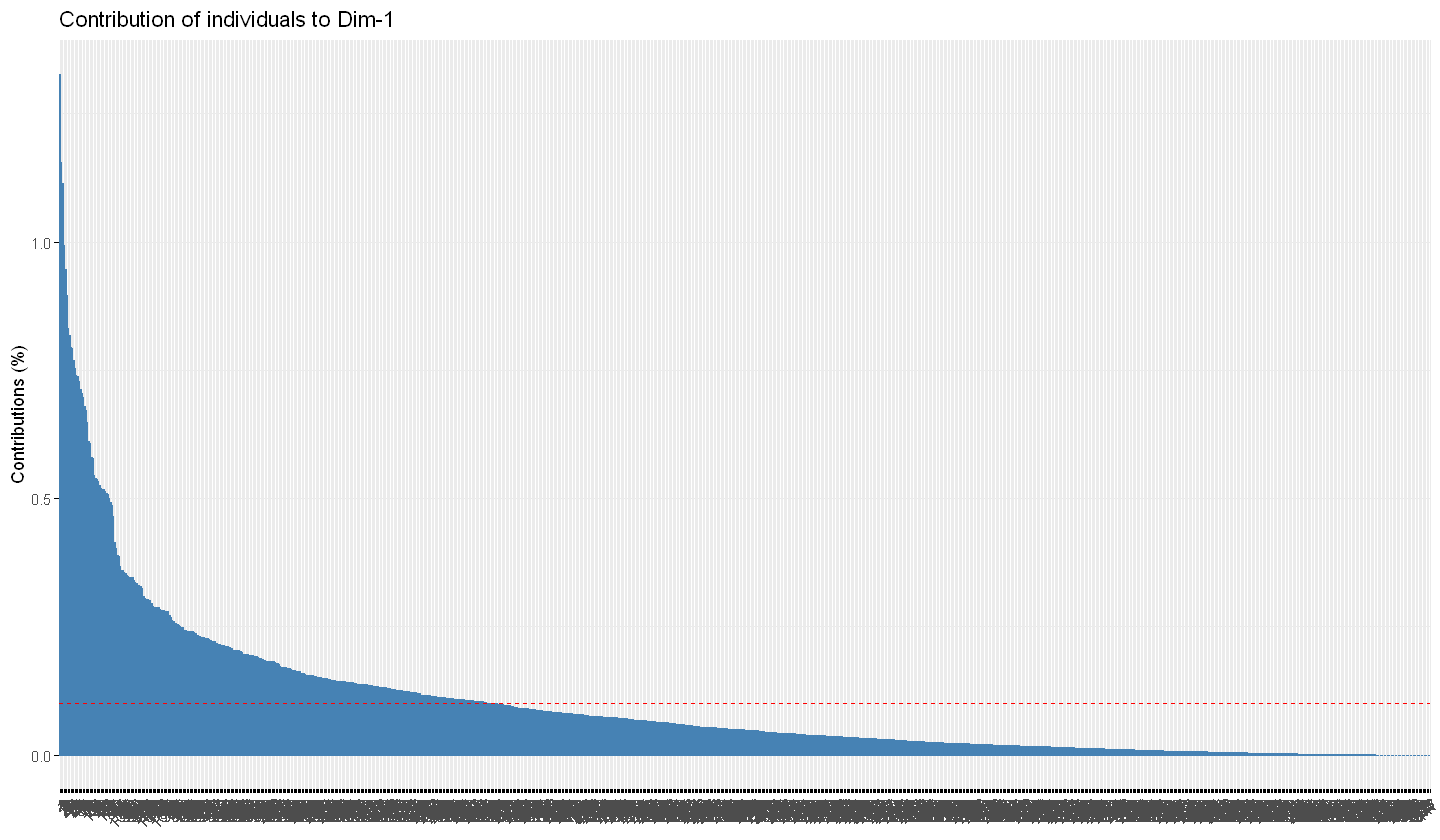

In [42]:
fviz_contrib(pca,choice="ind",axes=1)

<font size=4>
Let's see the first names

In [44]:
names[order(get_pca_ind(pca)$contrib[,1],decreasing=T)][1:10]

[1] "Michael Jordan"    "Allen Iverson"     "LeBron James"     
 [4] "Karl Malone"       "Kevin Durant"      "Russell Westbrook"
 [7] "Charles Barkley"   "DeMarcus Cousins"  "Kobe Bryant"      
[10] "Larry Bird"

In [45]:
# It is very similar to names[order(pca$x[,1])][1:10] but in percentage

In [103]:
names[1:20]

[1] "Michael Jordan"      "Kevin Durant"        "LeBron James"       
 [4] "Allen Iverson"       "George Gervin"       "Karl Malone"        
 [7] "Kobe Bryant"         "Dominique Wilkins"   "Carmelo Anthony"    
[10] "Kareem Abdul-Jabbar" "Larry Bird"          "Adrian Dantley"     
[13] "Pete Maravich"       "Shaquille O'Neal"    "Dwyane Wade"        
[16] "Rick Barry"          "Stephen Curry"       "Russell Westbrook"  
[19] "Bernard King"        "James Harden"

<font size=4>
Finally, let’s make a zoom to see the top-20 players in contributions:

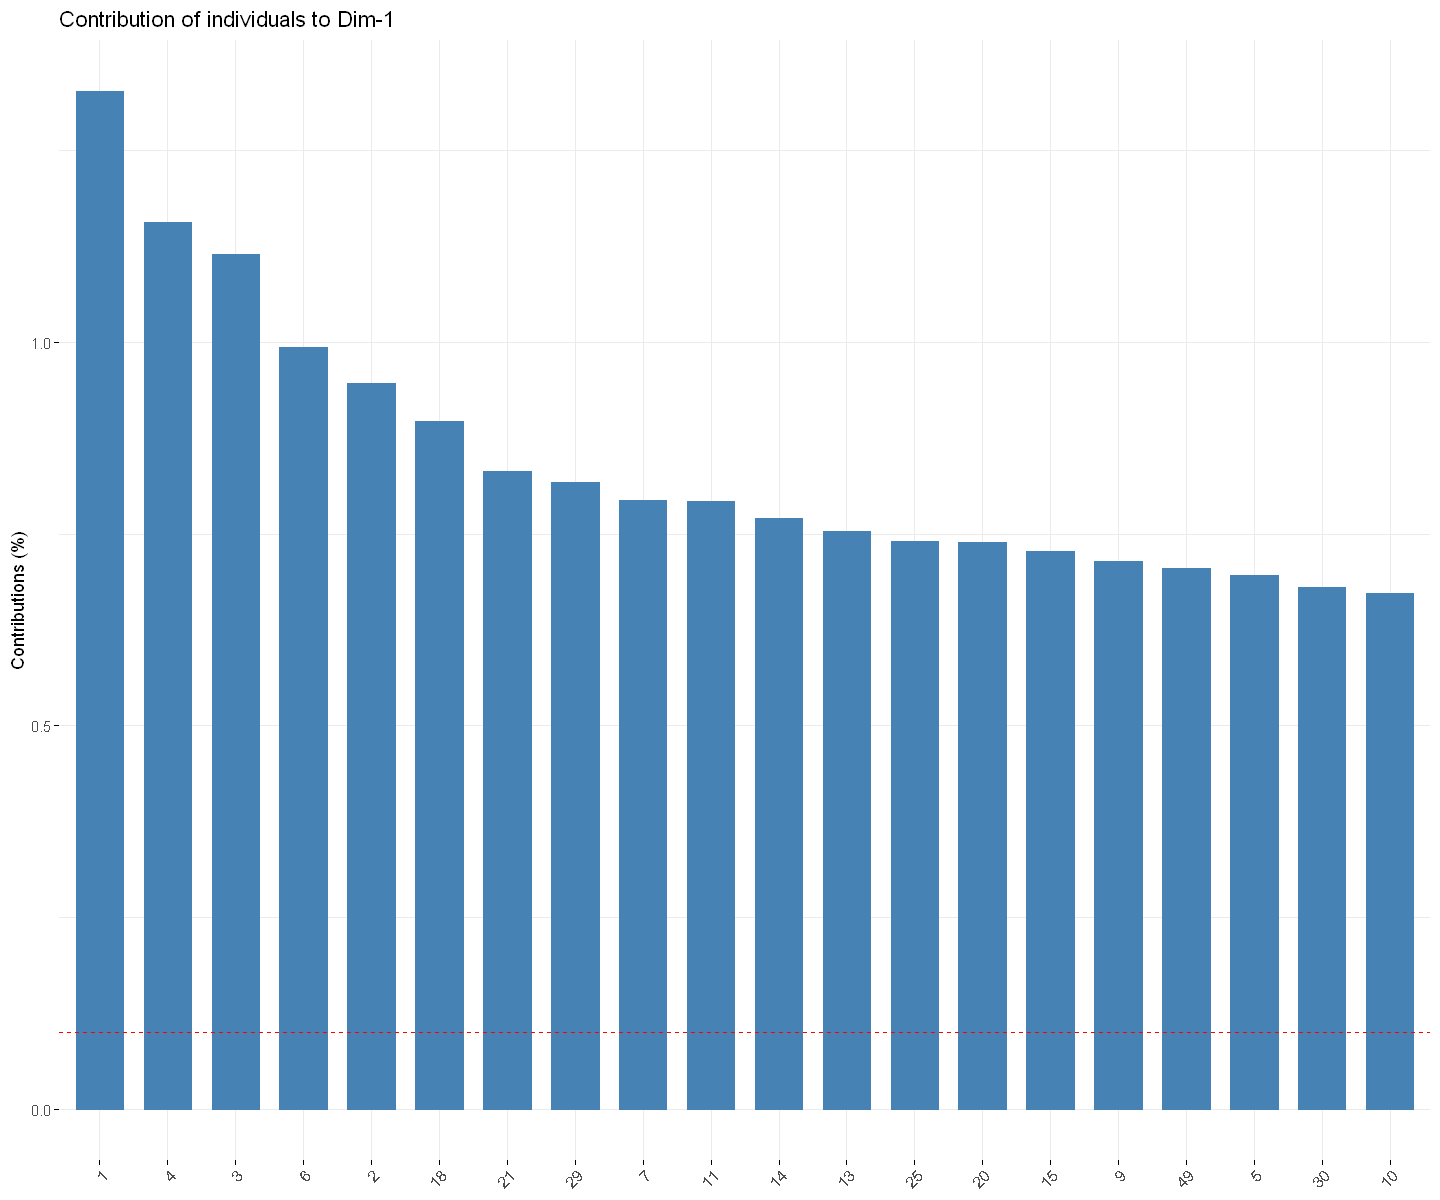

In [102]:
fviz_contrib(pca,choice="ind",axes=1,top=20)# + scale_x_discrete(labels=names)

<font size=7 color="#1651C7">
The biplot

<font size=4> Biplot: observations and variables in same graph (using first 2 components)

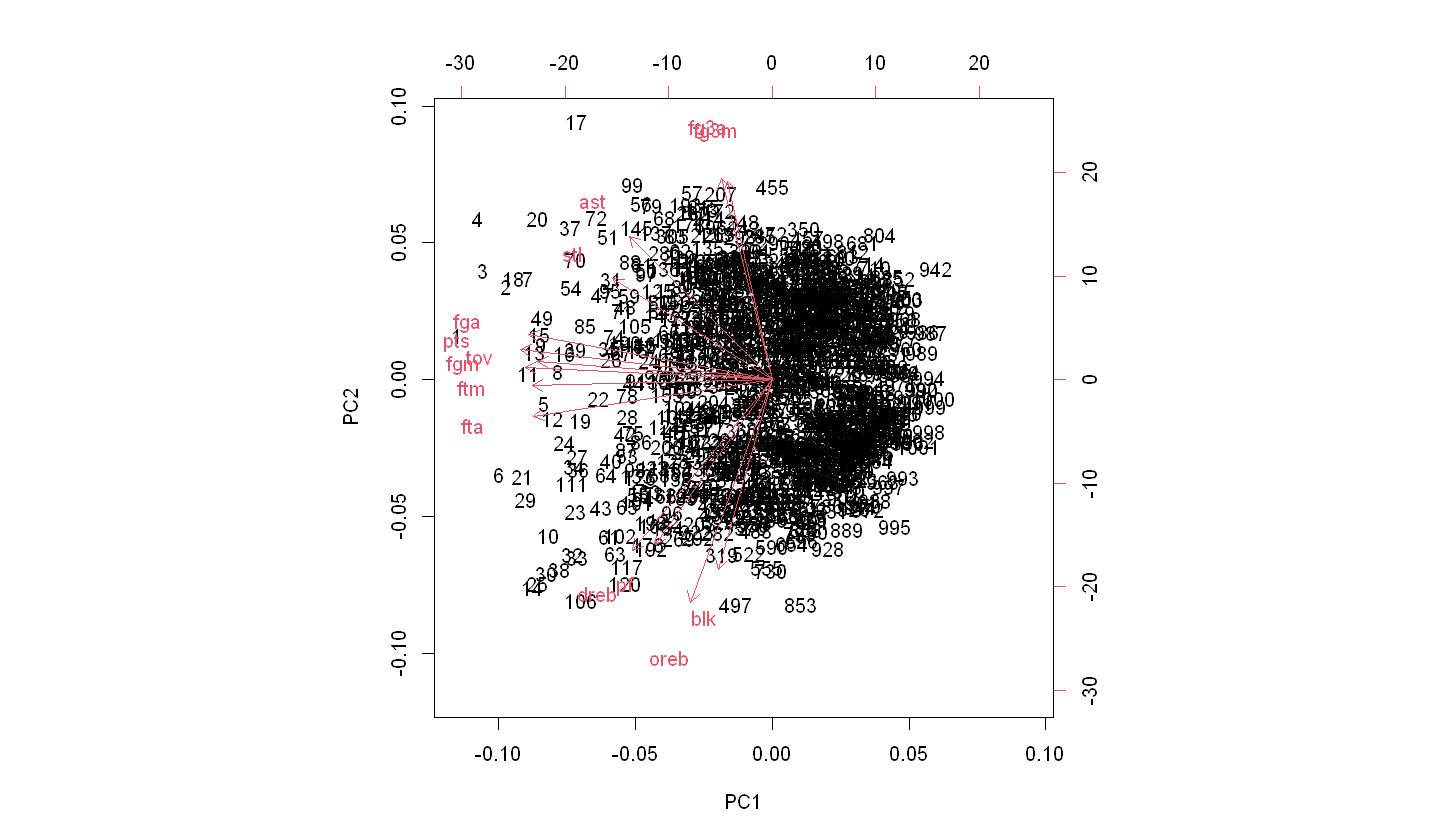

In [62]:
biplot(pca)

<font size=4> This is not very informative because we have too many players.
    <br>
    <br>
Better if we remove the players and use the contributions:

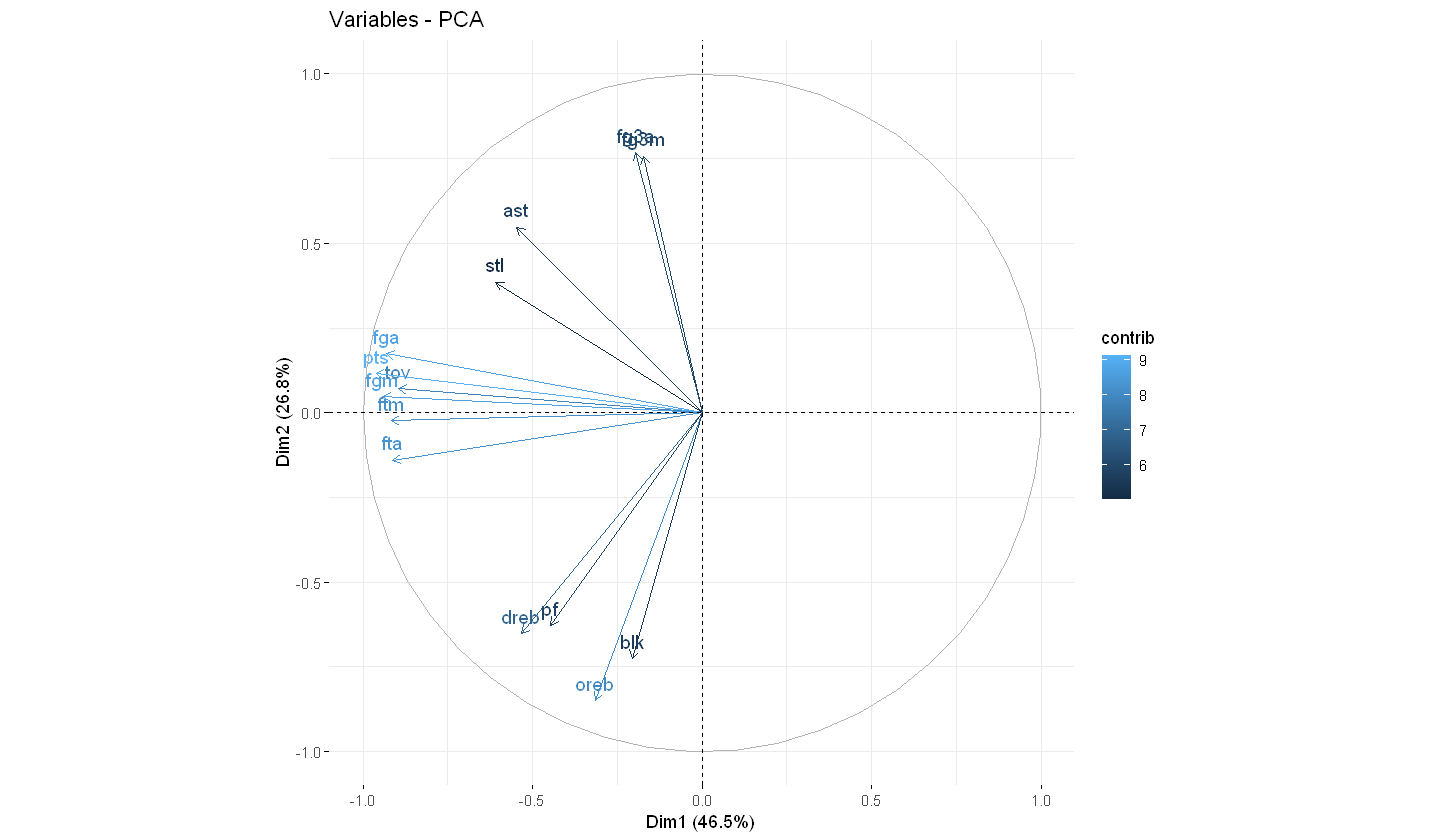

In [63]:
fviz_pca_var(pca,col.var="contrib")

Warning message:
"ggrepel: 889 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


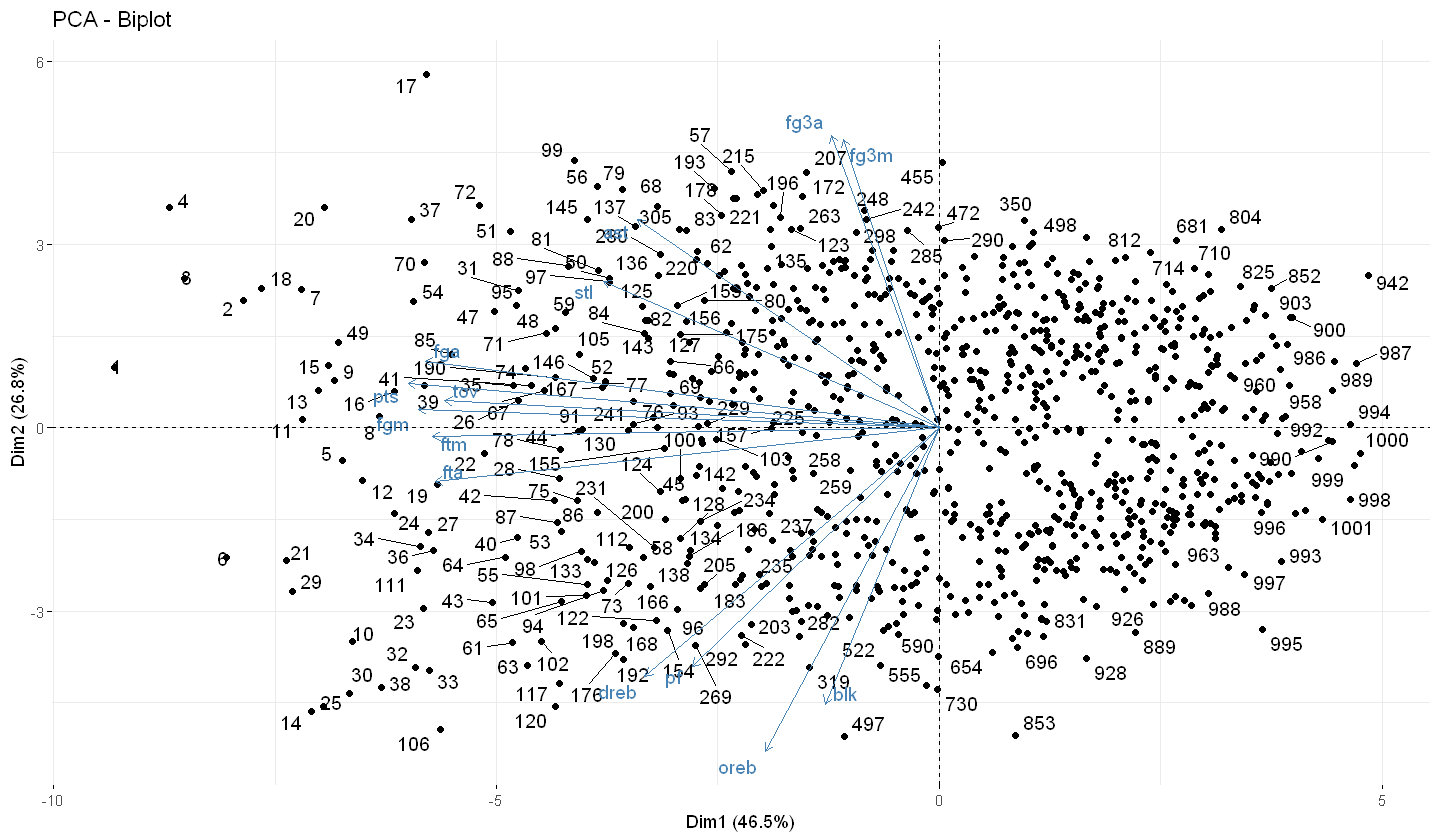

In [64]:
fviz_pca_biplot(pca,repel=T)

<font size=7 color="#1651C7">
The scores

<font size=4>
Remember, for the $j$-th principal component: $Z_j = X a_j$, $a_j$ denotes the loadings, and $Z_j$ denotes the scores. Let's plot the first two scores, using colors for minutes player:

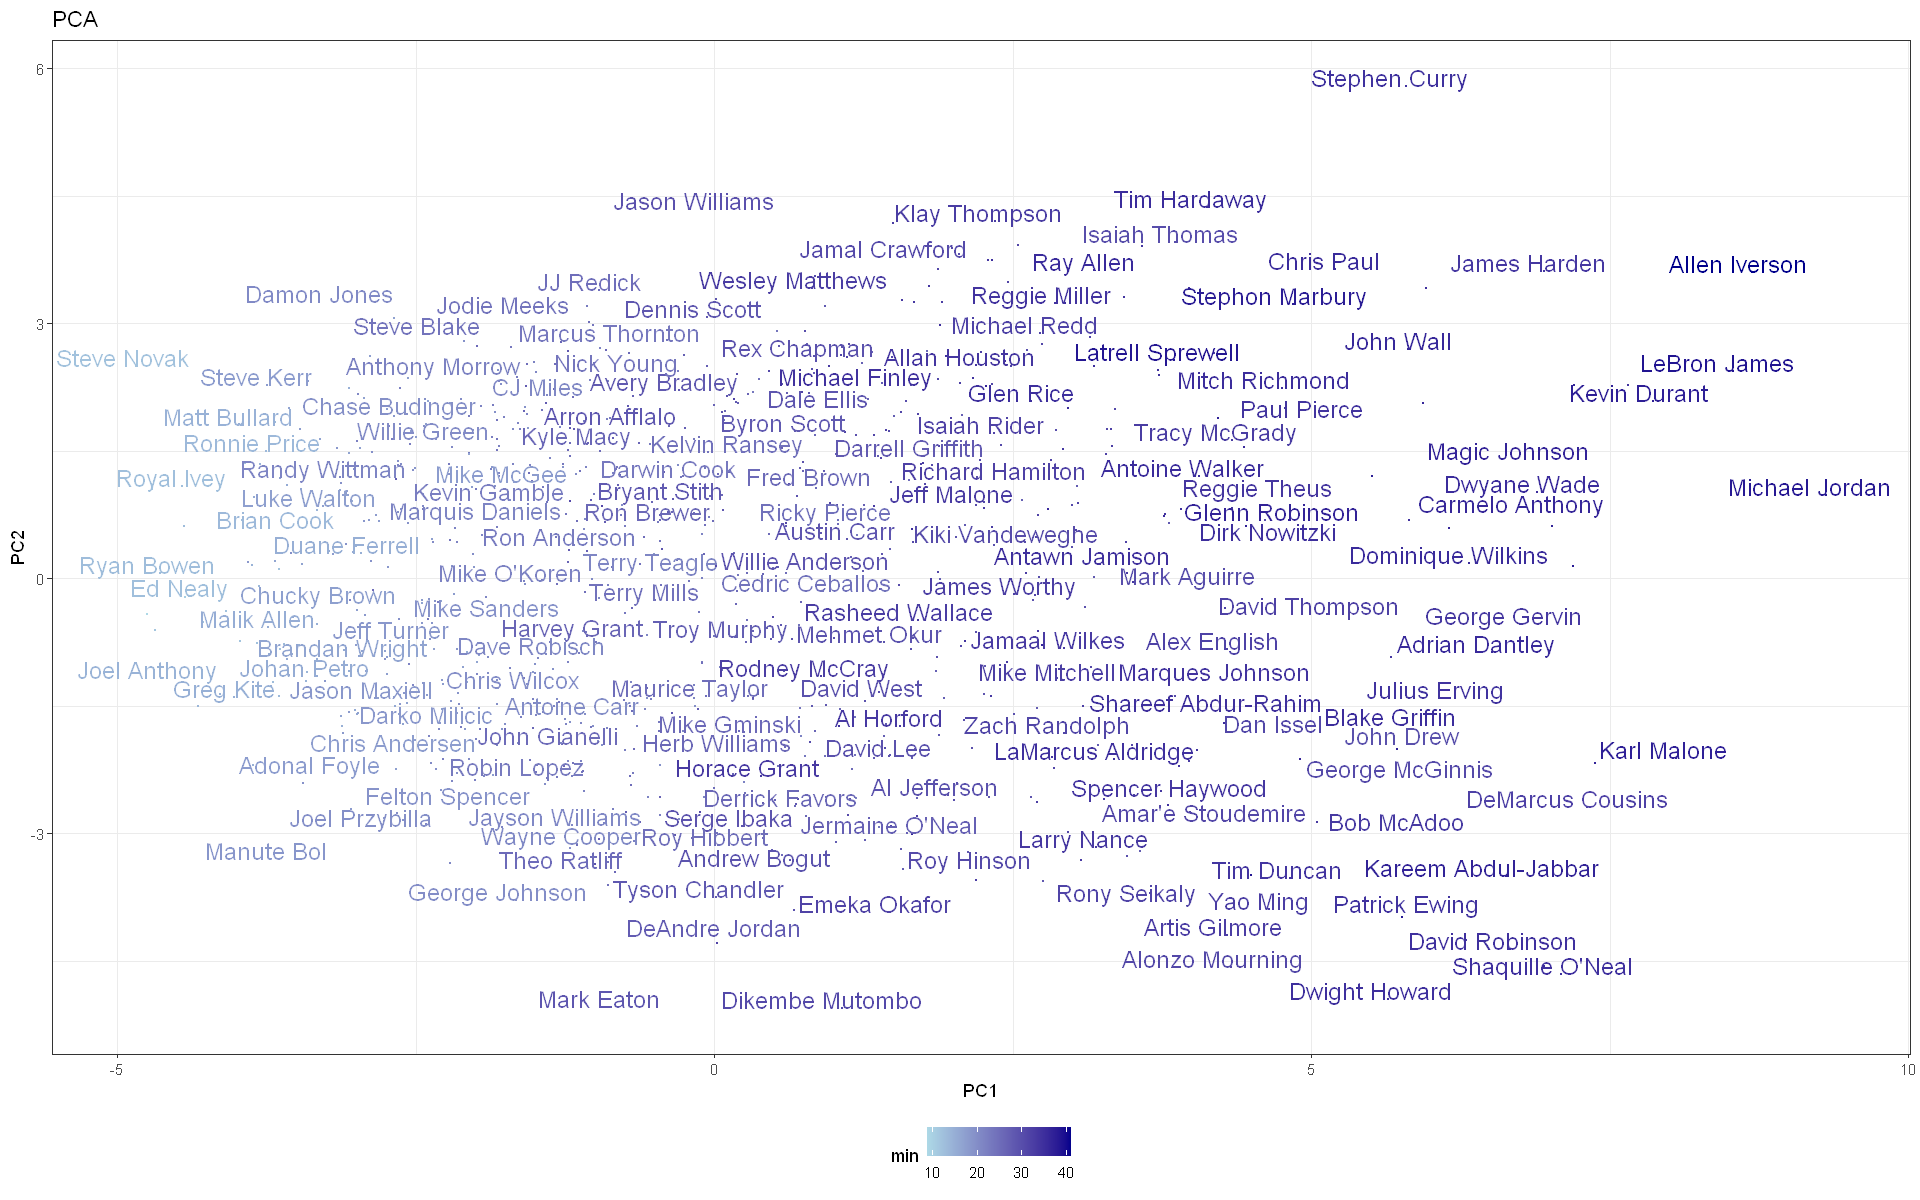

In [90]:
options(repr.plot.width=16,repr.plot.height=10)
data.frame(z1=-pca$x[,1],z2=pca$x[,2]) %>% 
ggplot(aes(z1,z2,label=names,color=min)) + geom_point(size=0) +
  labs(title="PCA", x="PC1", y="PC2") +
  theme_bw() + scale_color_gradient(low="lightblue", high="darkblue")+theme(legend.position="bottom") + 
  geom_text(size=5, hjust=0.6, vjust=0, check_overlap = TRUE) 


<font size=4>
The two first PCs seem independent, but this is not always the same. What is true is that they are always uncorrelated.

The same, but using colors for games played:

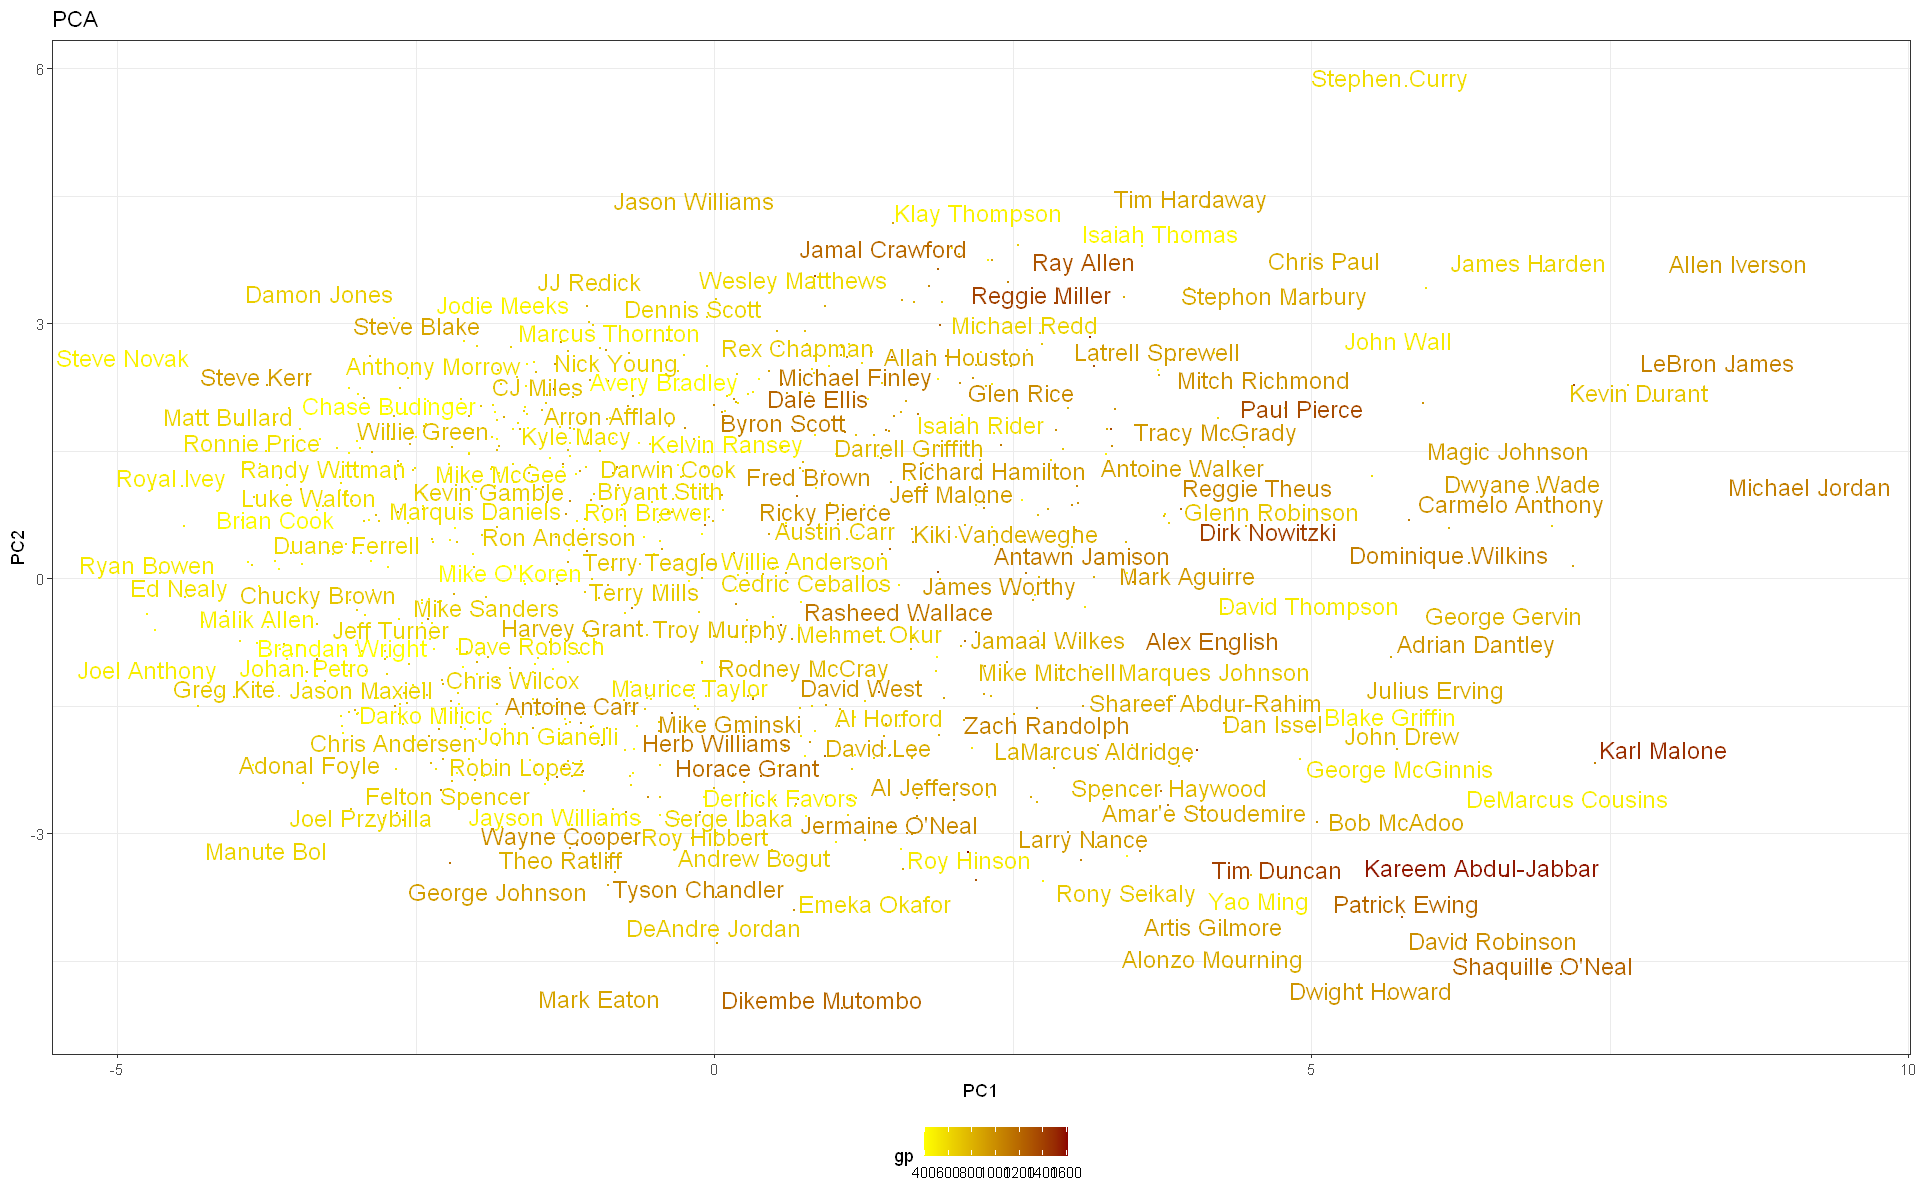

In [89]:
data.frame(z1=-pca$x[,1],z2=pca$x[,2]) %>% 
  ggplot(aes(z1,z2,label=names,color=gp)) + geom_point(size=0) +
  labs(title="PCA", x="PC1", y="PC2") +
  theme_bw() + scale_color_gradient(low="yellow", high="darkred")+theme(legend.position="bottom") + 
  geom_text(size=5, hjust=0.6, vjust=0, check_overlap = TRUE) 

<font size=4>
Insights?
<br>
    
Are the better players playing more minutes in a game?

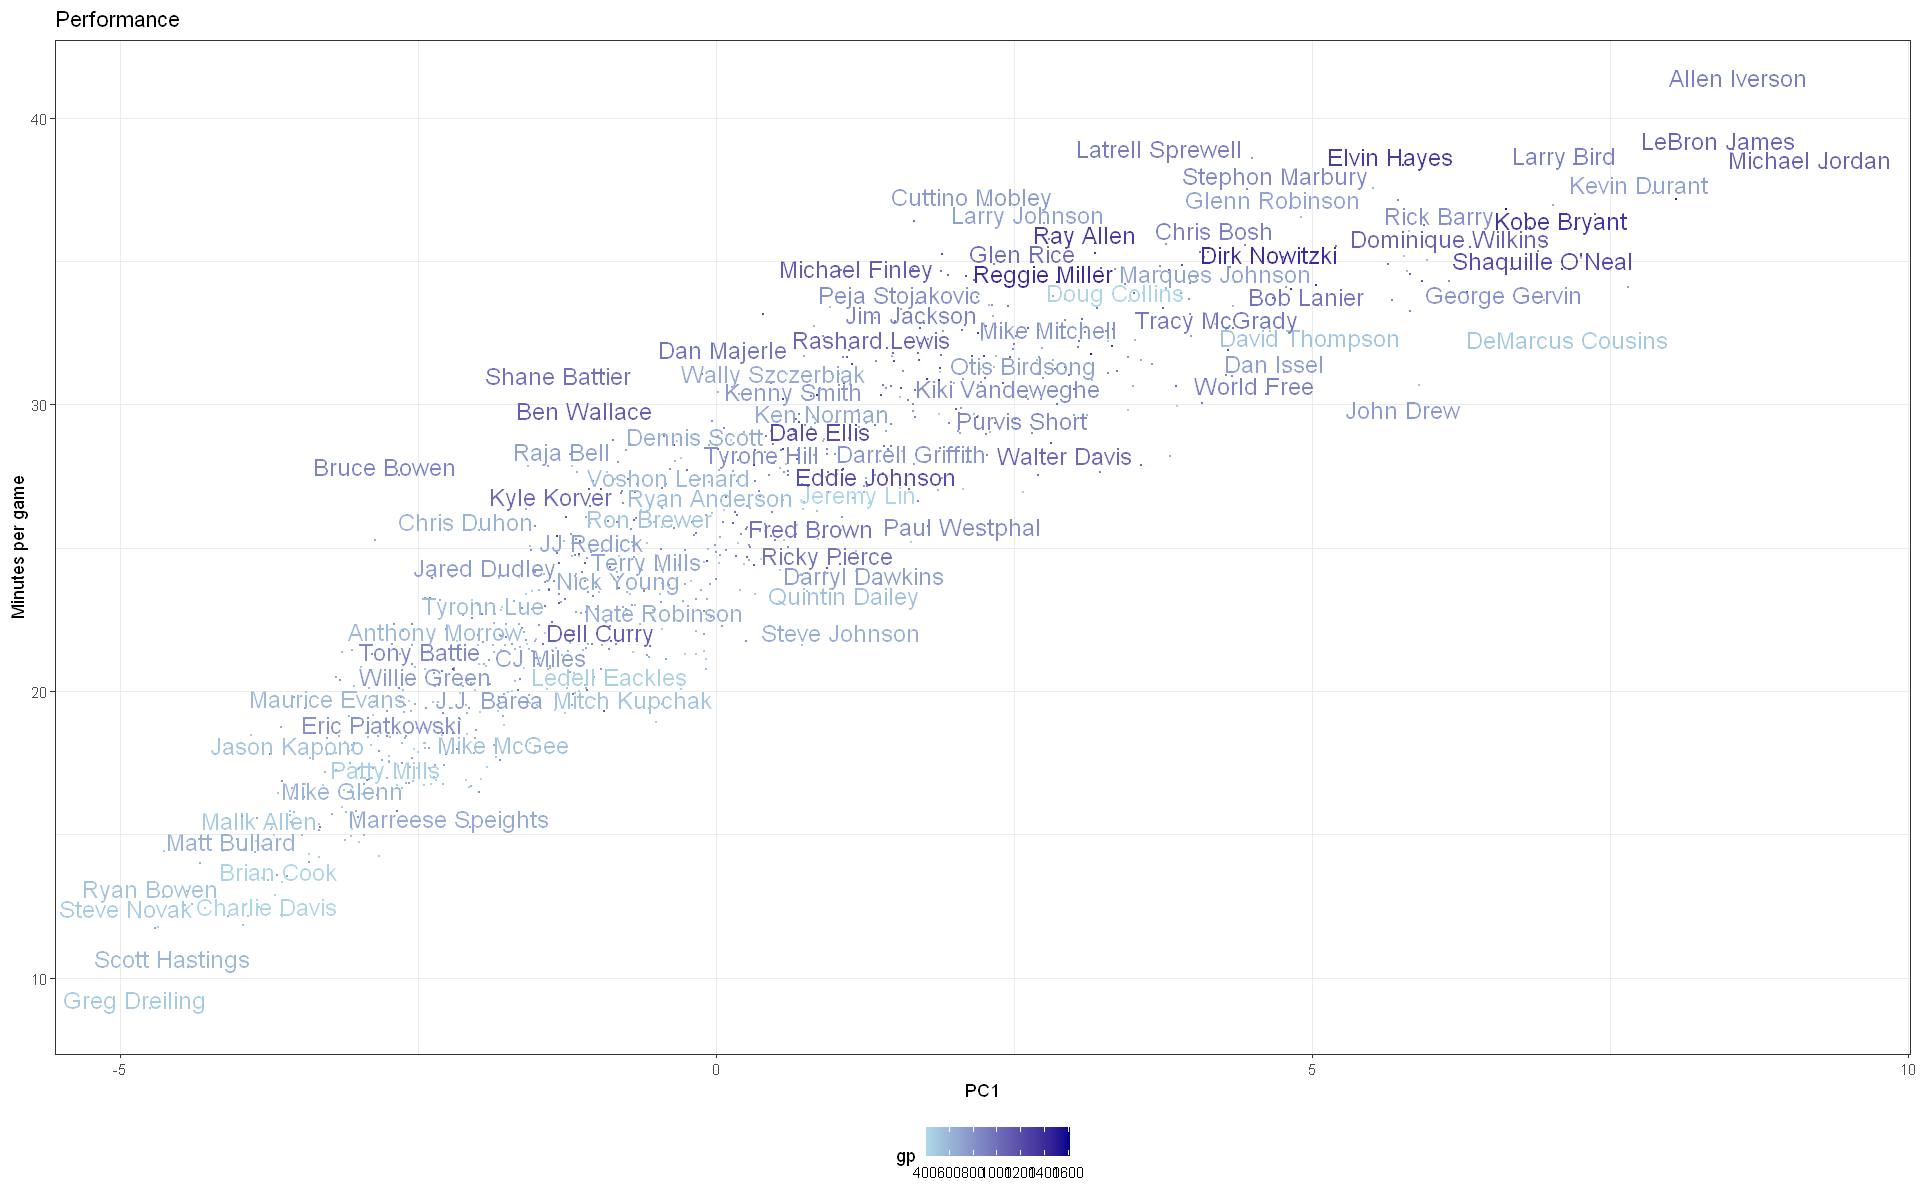

In [88]:
data.frame(z1=-pca$x[,1],z2=min) %>% 
  ggplot(aes(z1,z2,label=names,color=gp)) + geom_point(size=0) +
  labs(title="Performance", x="PC1", y="Minutes per game") +
  scale_color_gradient(low="lightblue", high="darkblue") +
  theme_bw() + theme(legend.position="bottom") + geom_text(size=5, hjust=0.6, vjust=0, check_overlap = TRUE)

<font size=4>
Yes!

<font size=4>
Are the better players playing more games?

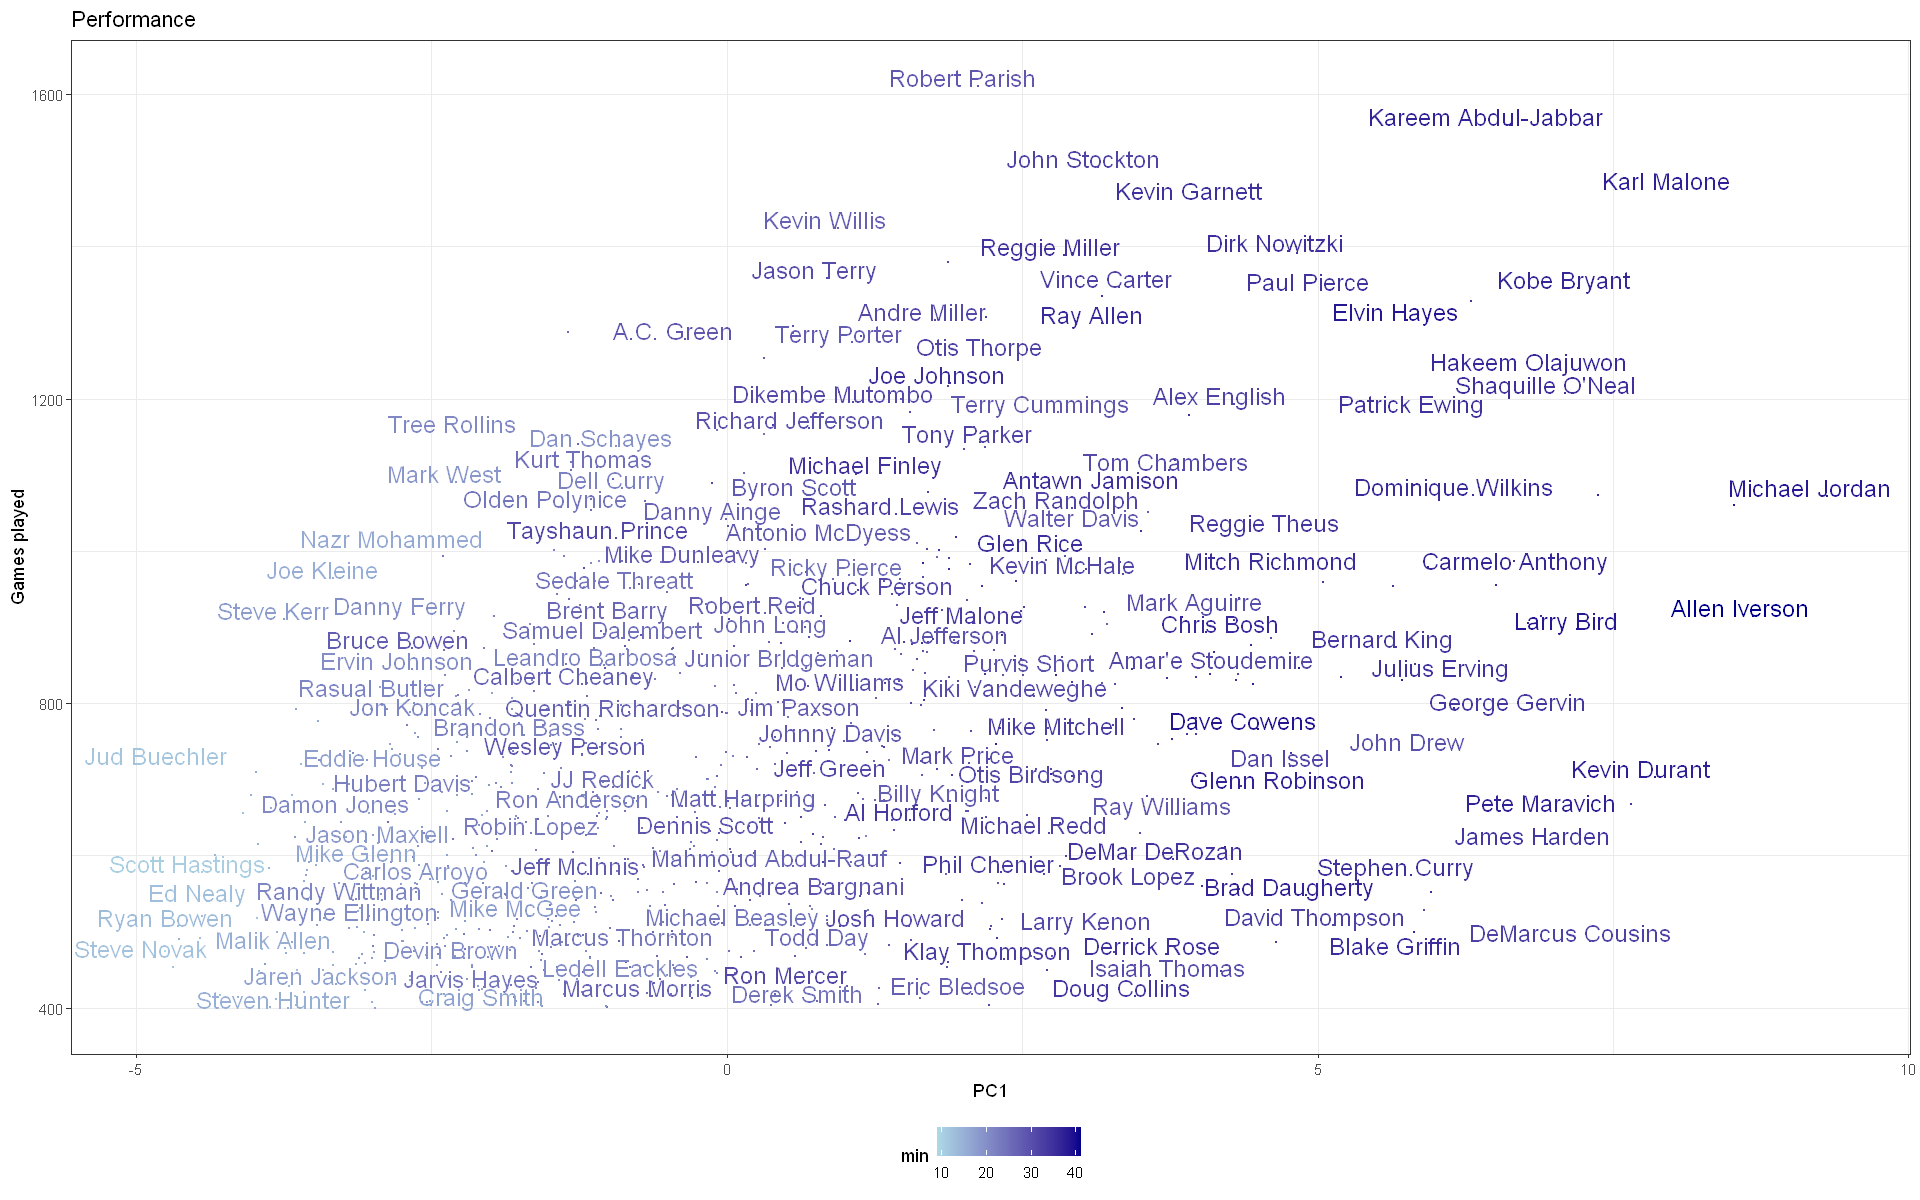

In [86]:
data.frame(z1=-pca$x[,1],z2=gp) %>% 
  ggplot(aes(z1,z2,label=names,color=min)) + geom_point(size=0) +
  labs(title="Performance", x="PC1", y="Games played") +
  scale_color_gradient(low="lightblue", high="darkblue") +
  theme_bw() + theme(legend.position="bottom") + geom_text(size=5, hjust=0.6, vjust=0, check_overlap = TRUE)


<font size=4>
Somehow, but not too much... why?